<div style=" font-size:22px; line_height:160%">
importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
# import warnings

In [2]:
# warnings.simplefilter(action="ignore")

<div style=" font-size:14px; line_height:160%">
dispaly all of the columns

In [3]:
pd.set_option("display.max_columns", None)

<div style=" font-size:14px; line_height:160%">
improting the datasets of train and test

In [4]:
mobile_data_train = pd.read_csv("D:\programming\Machine Learning/mobile_train_dataset.csv")
mobile_data_test = pd.read_csv("D:\programming\Machine Learning/mobile_test_dataset.csv")

<div style=" font-size:14px; line_height:160%">
showing the top 5 rows of the datasets

In [5]:
mobile_data_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
mobile_data_test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


<div style=" font-size:18px; line_height:160%">
the last column - "price_range" - is our target

<div style=" font-size:14px; line_height:160%">
making a copy of the train dataset

In [7]:
df = mobile_data_train.copy()

df.shape

(2000, 21)

In [8]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


<div style=" font-size:14px; line_height:160%">
in the cell below we see the analytical information of the dataset

In [9]:
df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<div style=" font-size:14px; line_height:160%">
to check if the dataset has NaN values and also to see the type of each feature

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<div style=" font-size:14px; line_height:160%">
We don't have missing values.

<div style=" font-size:14px; line_height:160%">
to see how many unique values are in each column:

In [11]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

<div style=" font-size:14px; line_height:160%">
to find out if there are any duplicate rows in the dataset:

In [12]:
df.index.duplicated().sum()

0

<div style=" font-size:14px; line_height:160%">
there is no duplicated rows in the dataset.

<div style=" font-size:14px; line_height:160%">
drawing the correlation diagram:

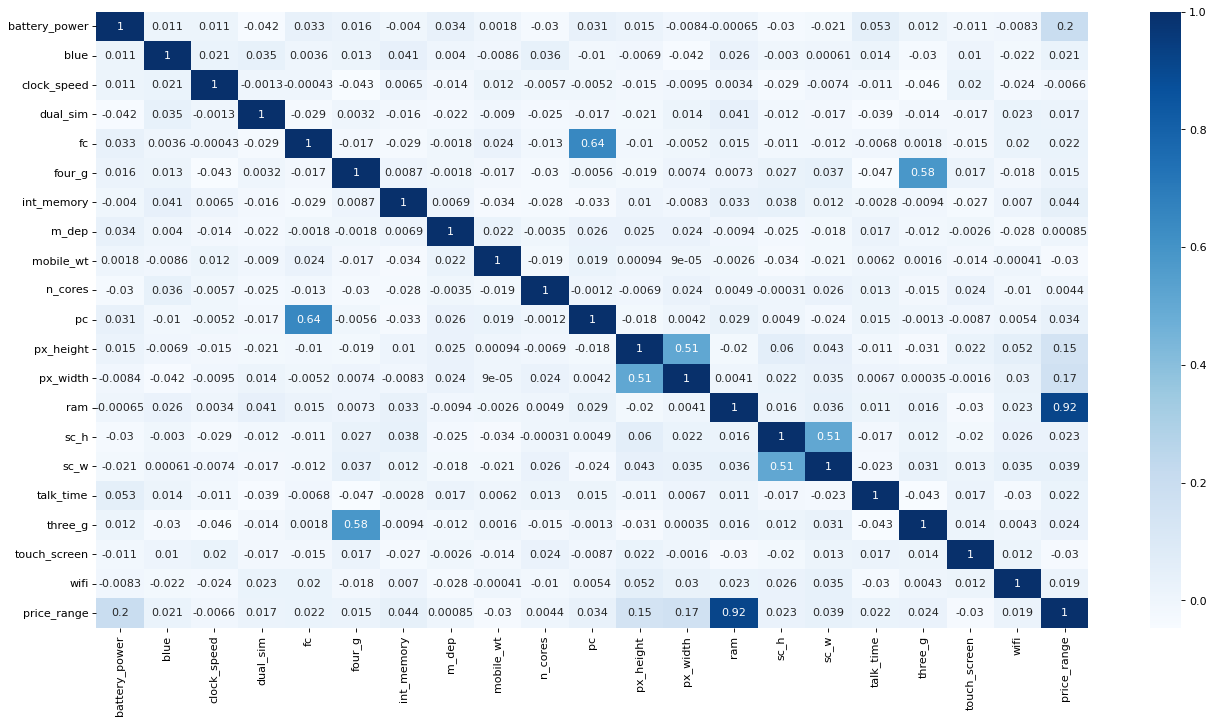

In [13]:
plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

<div style=" font-size:14px; line_height:160%">
we can say there is no significant correlation between the features.

<div style=" font-size:14px; line_height:160%">
defining a function to draw the scatter plots between the target and features:

In [14]:
def scatter_plots(df_name, x_ax_name, y_ax_name):
    scatter_name = f"{y_ax_name}-{x_ax_name}"
    fig_output_name = scatter_name
    plt.title(f"{x_ax_name} - {y_ax_name}\n")
    scatter_name = plt.scatter(df_name[x_ax_name], df_name[y_ax_name])
    scatter_name.axes.tick_params(gridOn=True, size=12, labelsize=10)
    plt.xlabel(f"\n{x_ax_name}", fontsize=20)
    plt.ylabel(f"{y_ax_name}\n", fontsize=20)
    plt.xticks(rotation=90)


<div style=" font-size:14px; line_height:160%">
defining a function to draw scatter plots side by side:

In [15]:
def scatter_subplots(df):
    i=0
    j = len(df.columns)-1
    while i < len(df.columns)-1:
        plt.figure(figsize=(20,8), dpi=80)
        for k in range(3): 
            plt.subplot(1, 3, k+1)
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)            
            i += 1
        plt.suptitle("Plotting Each Feature Against The Target", size = 30, fontweight = "bold")
        plt.tight_layout()
        plt.show()
        if j-i == 2:
            plt.subplot(1, 2, 1)
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)   
            i += 1
            plt.subplot(1, 2, 2)
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)
            i += 1
            plt.suptitle("Plotting Each Feature Against The Target", size = 30, fontweight = "bold")
            plt.tight_layout()
            plt.subplots_adjust(wspace=2.5)
            plt.show()
        elif j-i == 1:
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)
            i += 1
            plt.suptitle("Plotting Each Feature Against The Target", size = 30, fontweight = "bold")
            plt.tight_layout()
            plt.subplots_adjust(wspace=2.5)
            plt.show()
        elif i == j:
            break


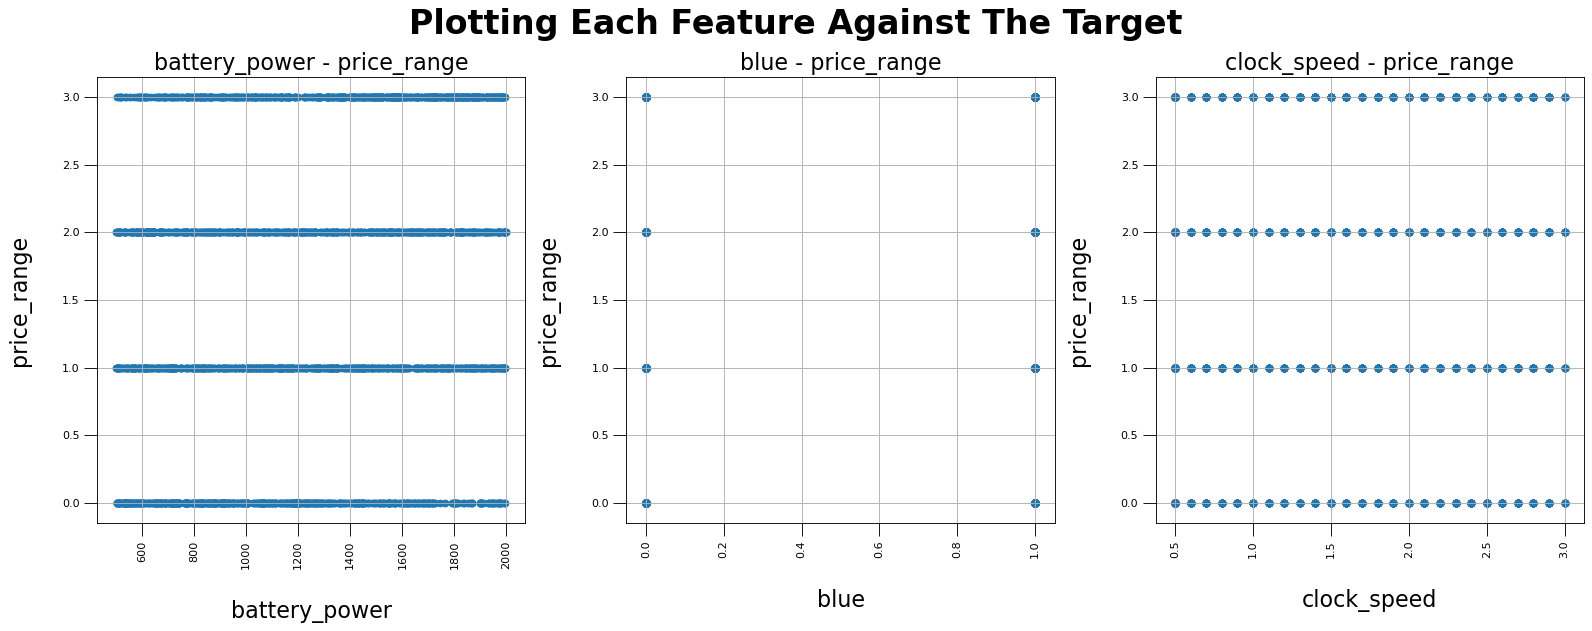

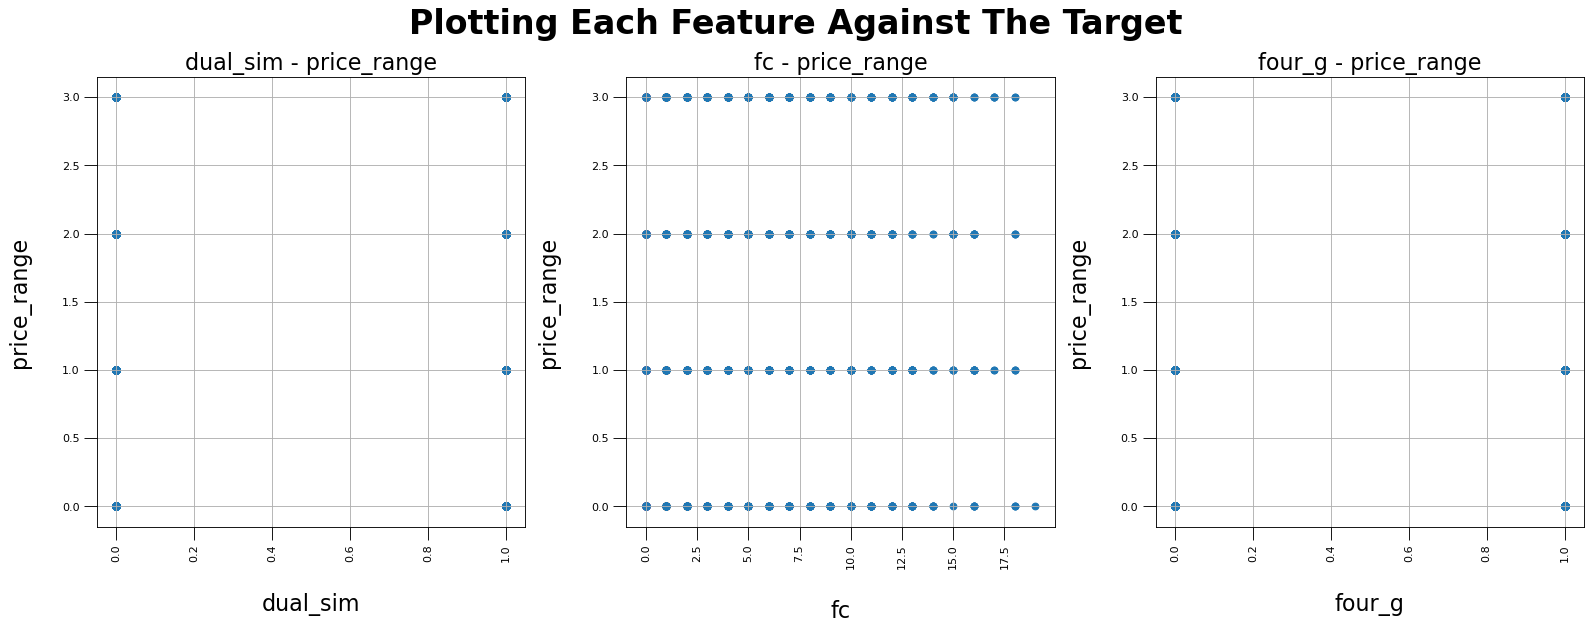

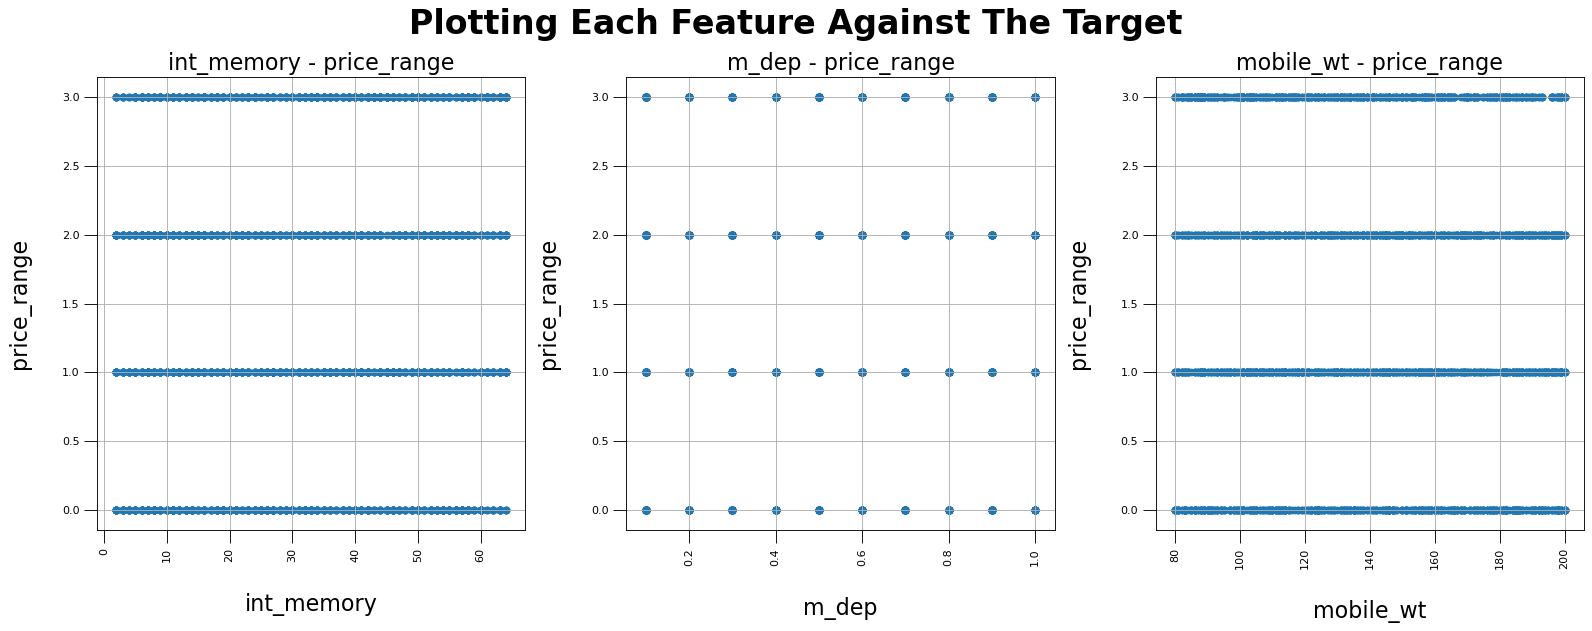

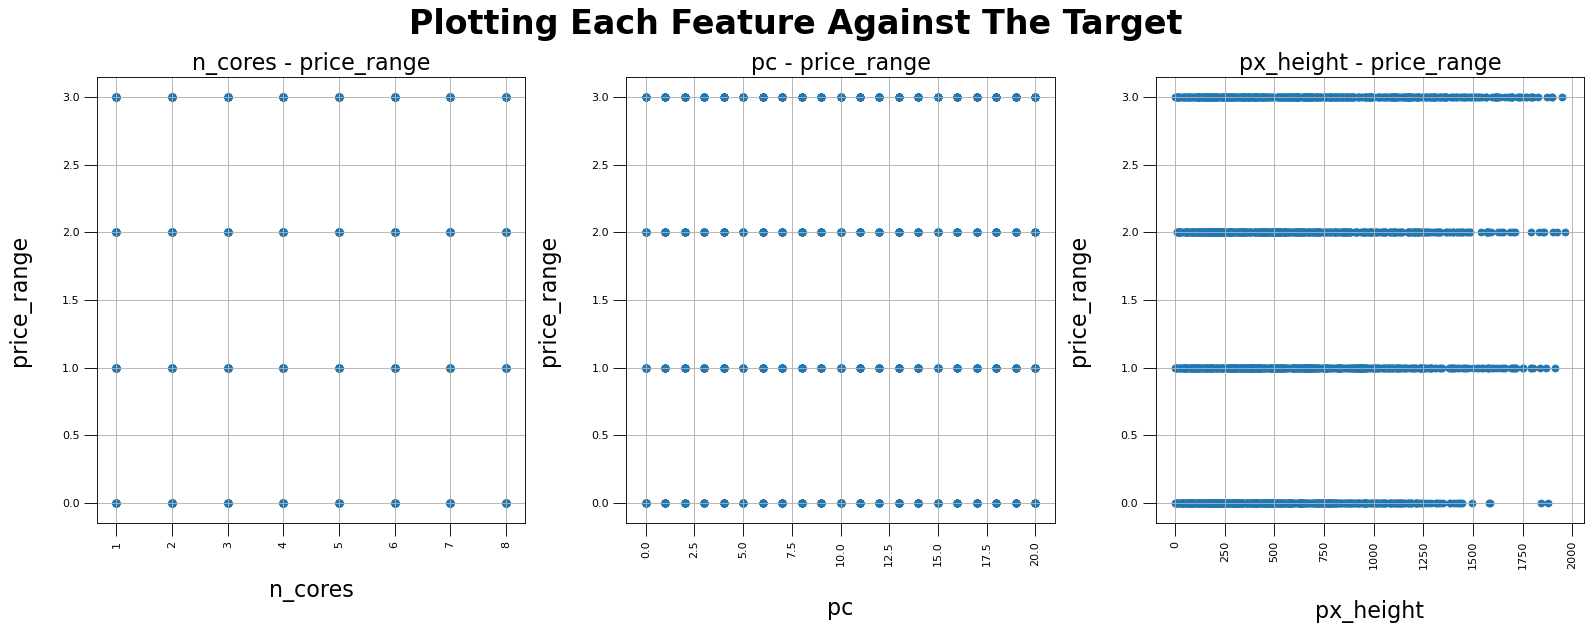

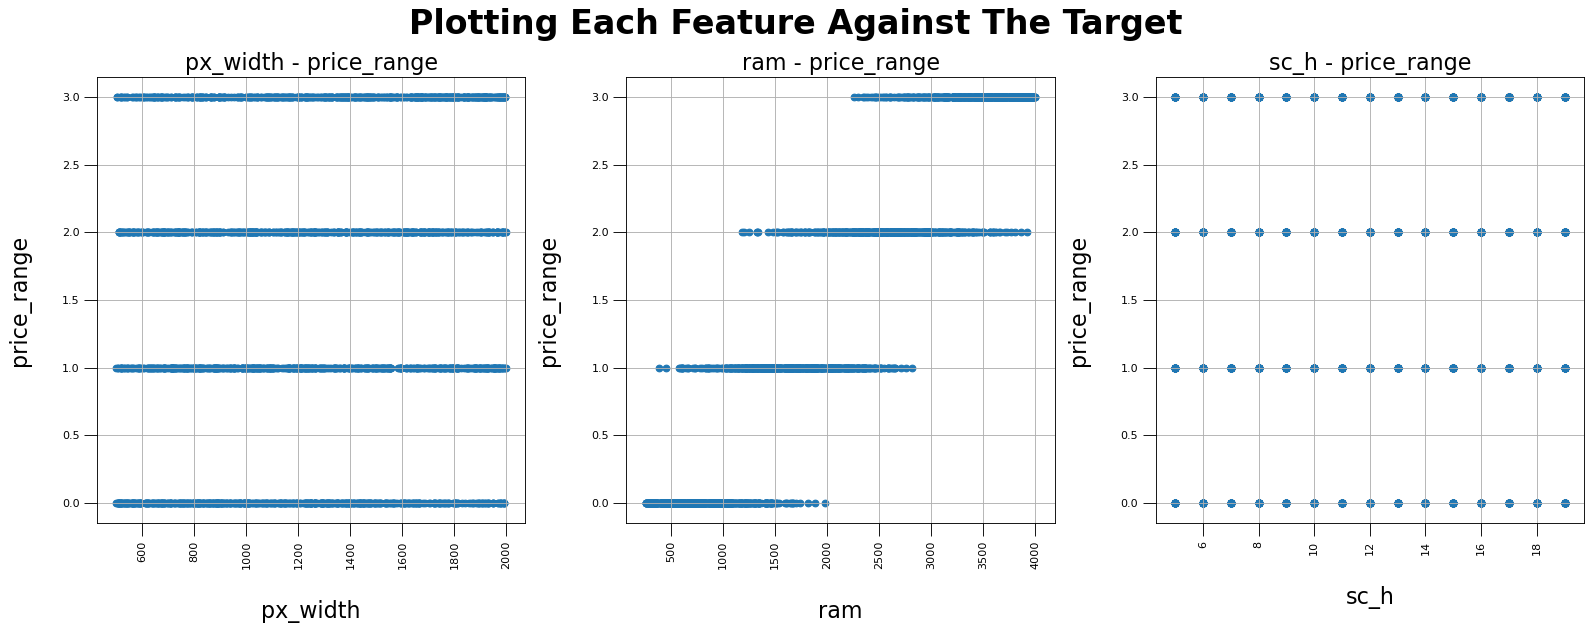

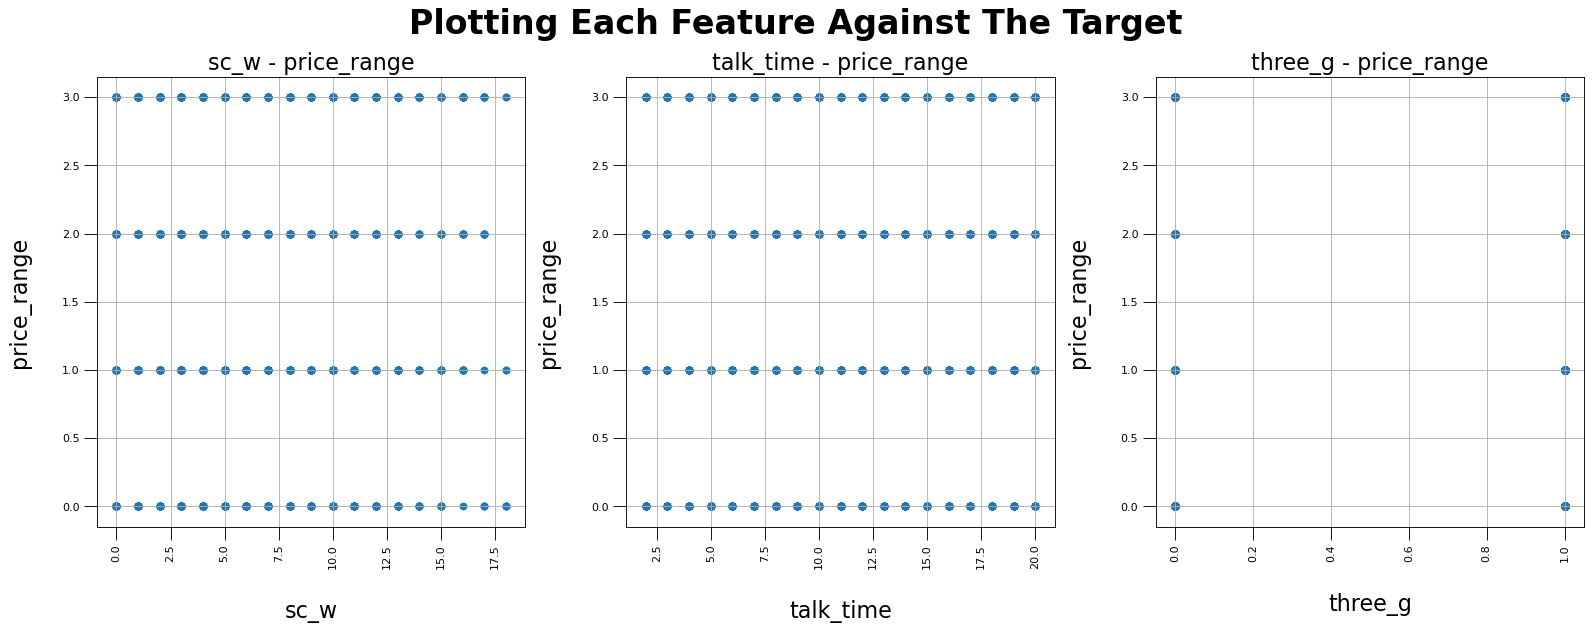

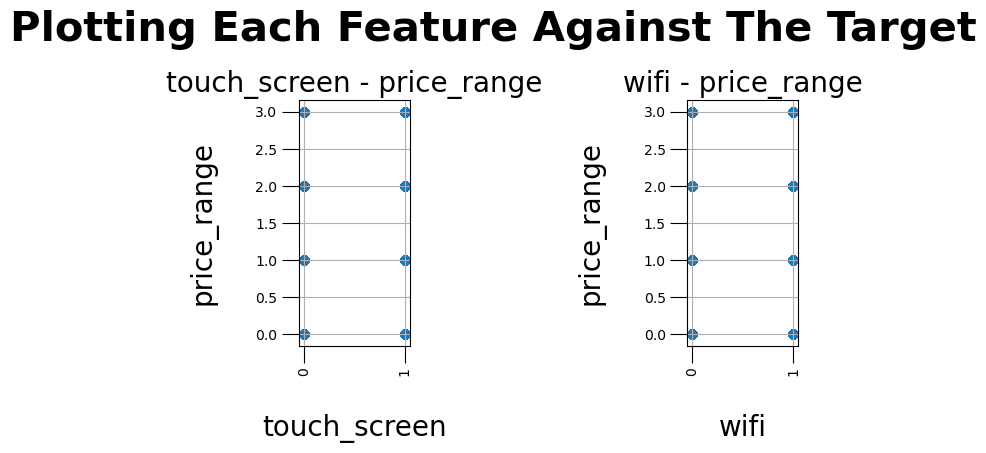

In [16]:
scatter_subplots(df)

<div style=" font-size:14px; line_height:160%">
defining a function to count the redundancy of categories in each feature:

In [17]:
def count_plots(df_name, column_name):

    plt.figure(figsize=(20, 8), dpi=90)
    ax = sns.countplot(x=column_name, data=df)
    ax.bar_label(ax.containers[0], fontsize=13)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=15)
    plt.xlabel(f"\n{column_name}", fontsize=20)
    plt.ylabel("count",fontsize=20)
    plt.title(f"Count of {column_name}", fontsize=30)
    plt.grid()

<div style=" font-size:14px; line_height:160%">
drawing the count plots:

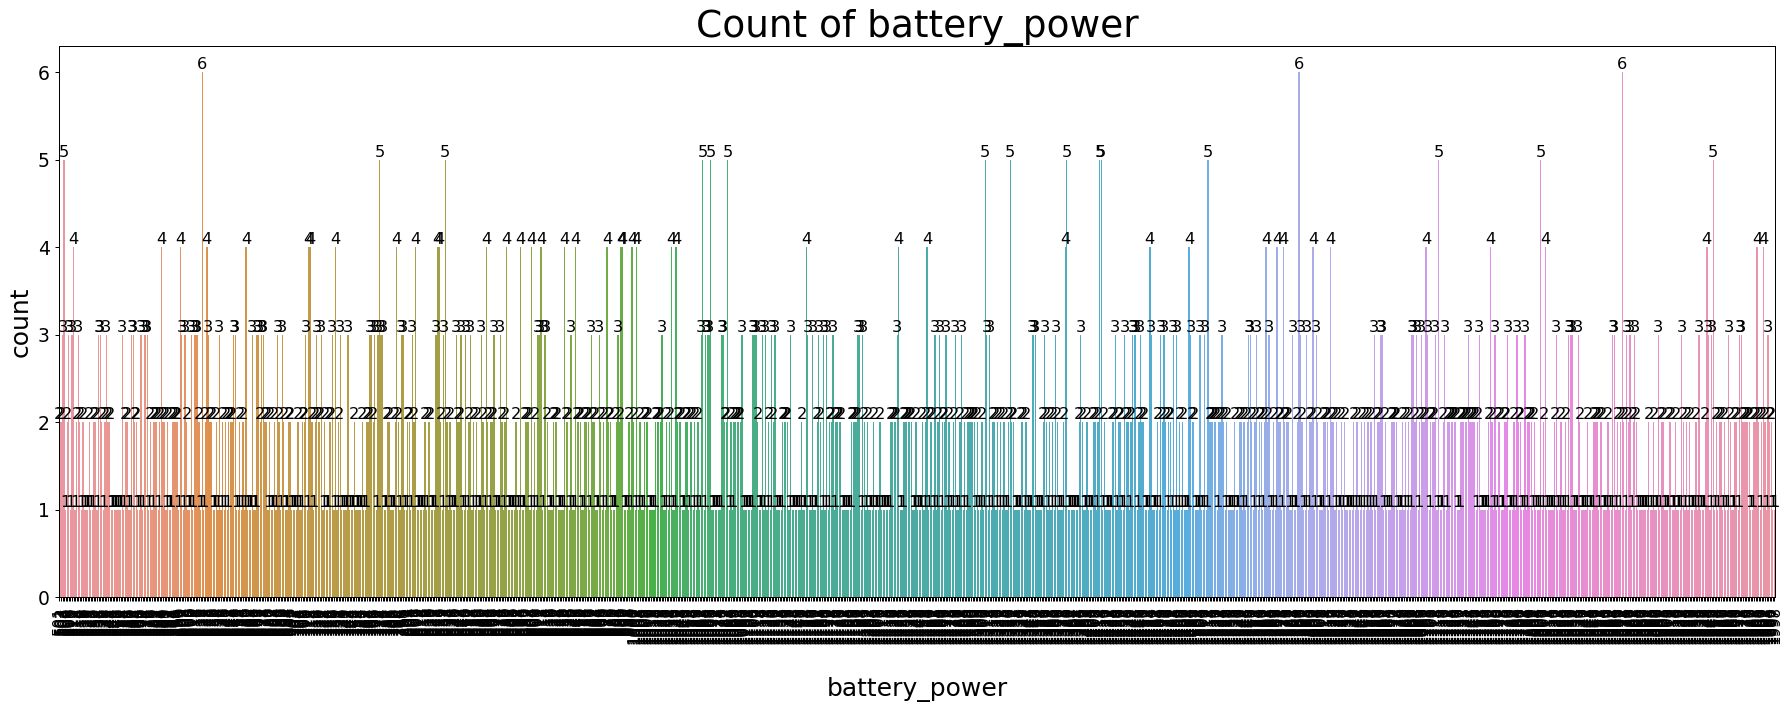

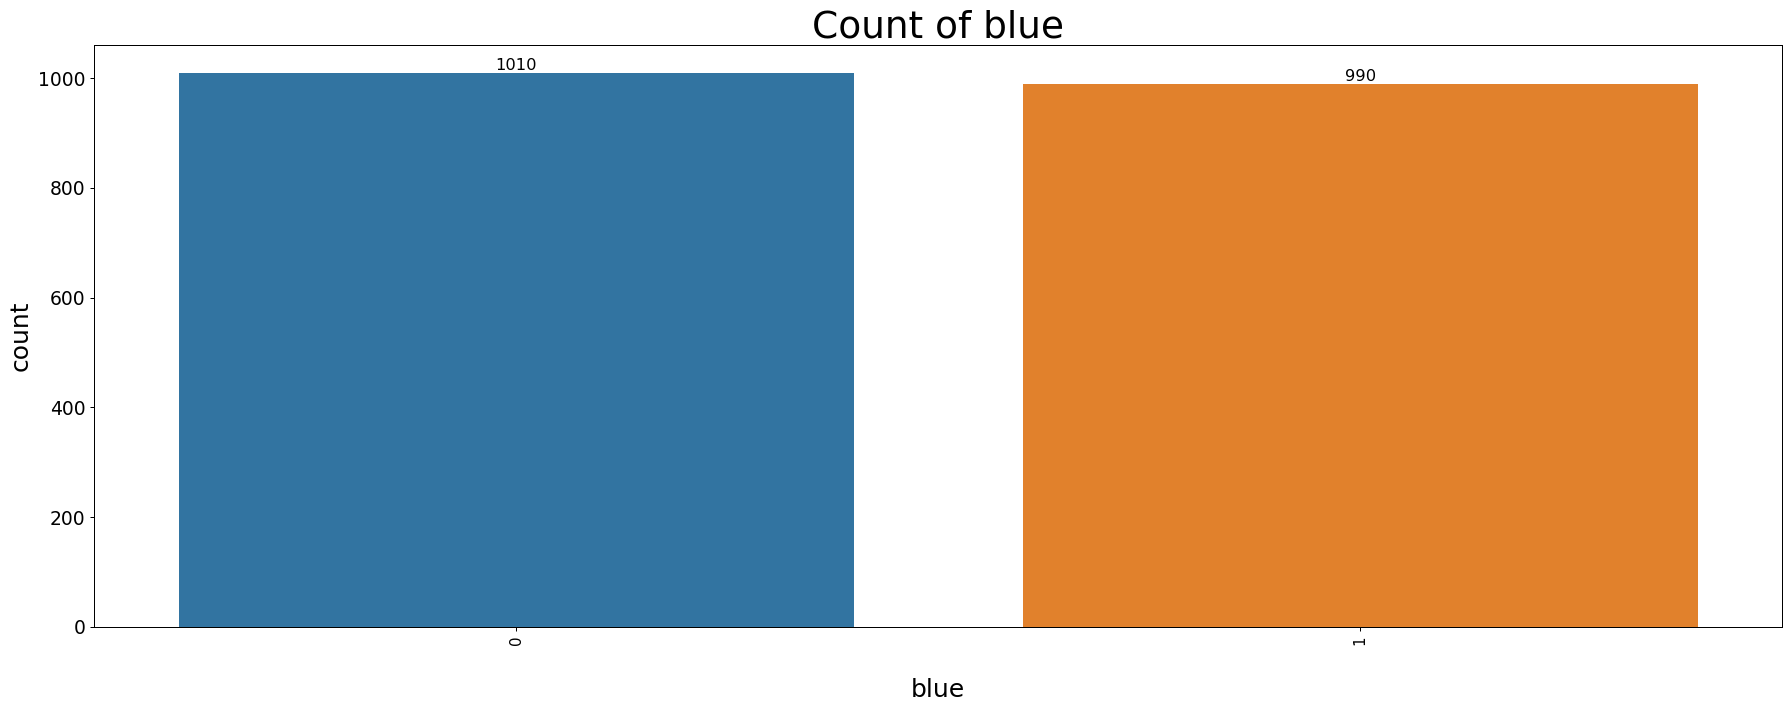

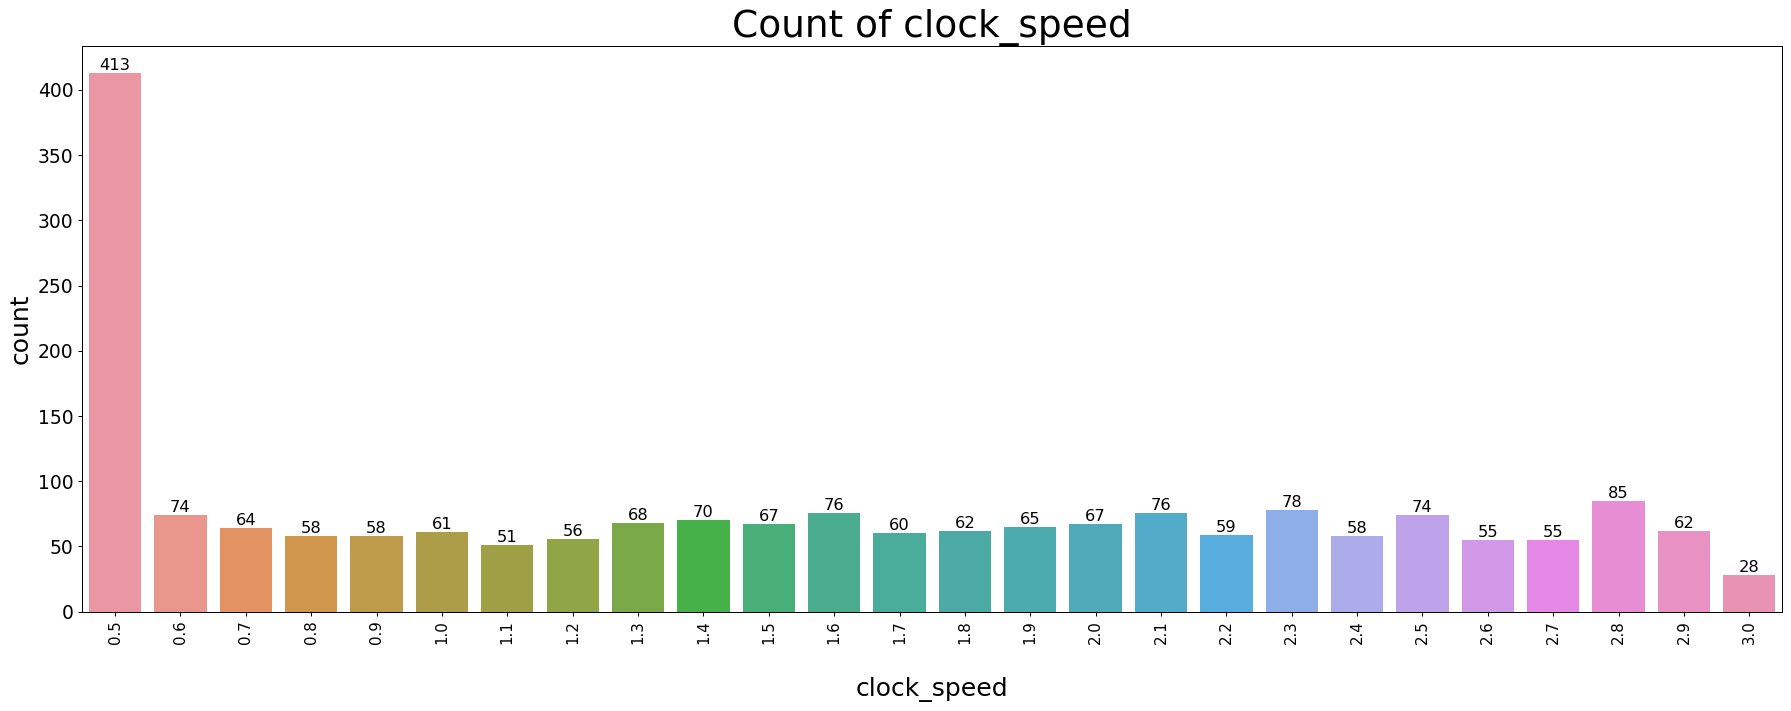

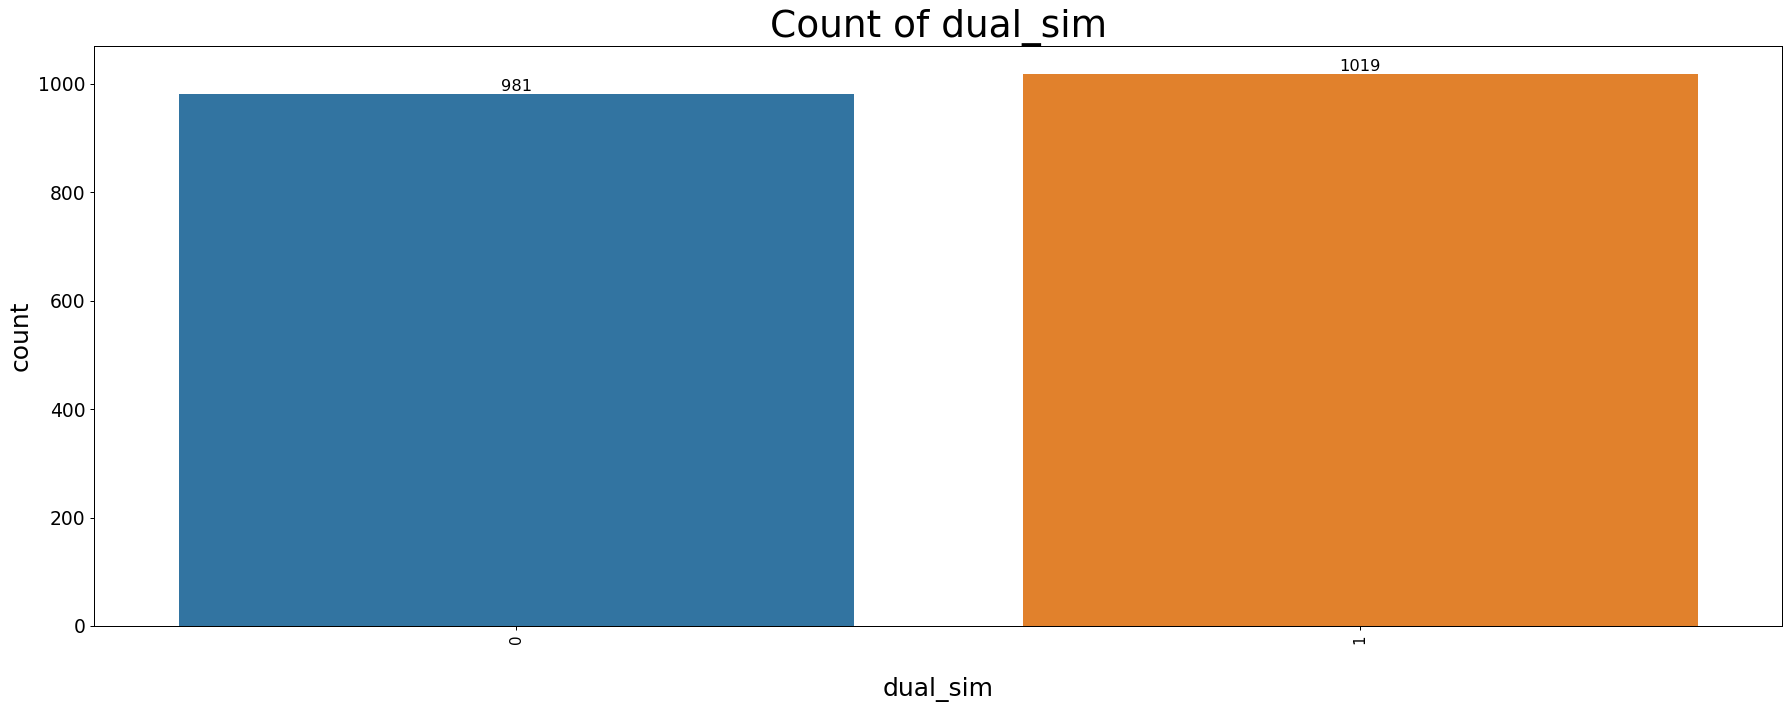

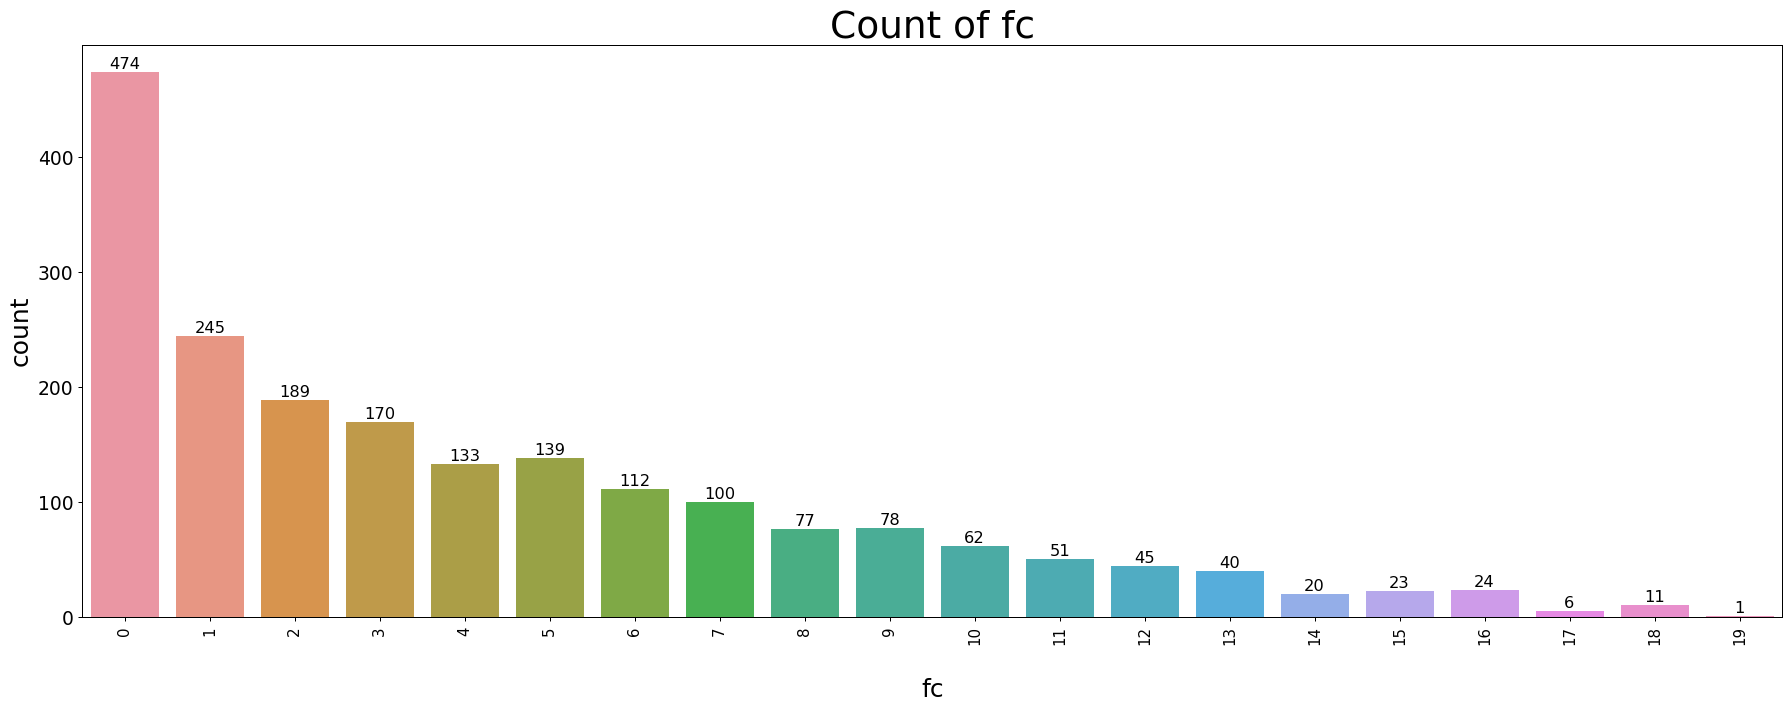

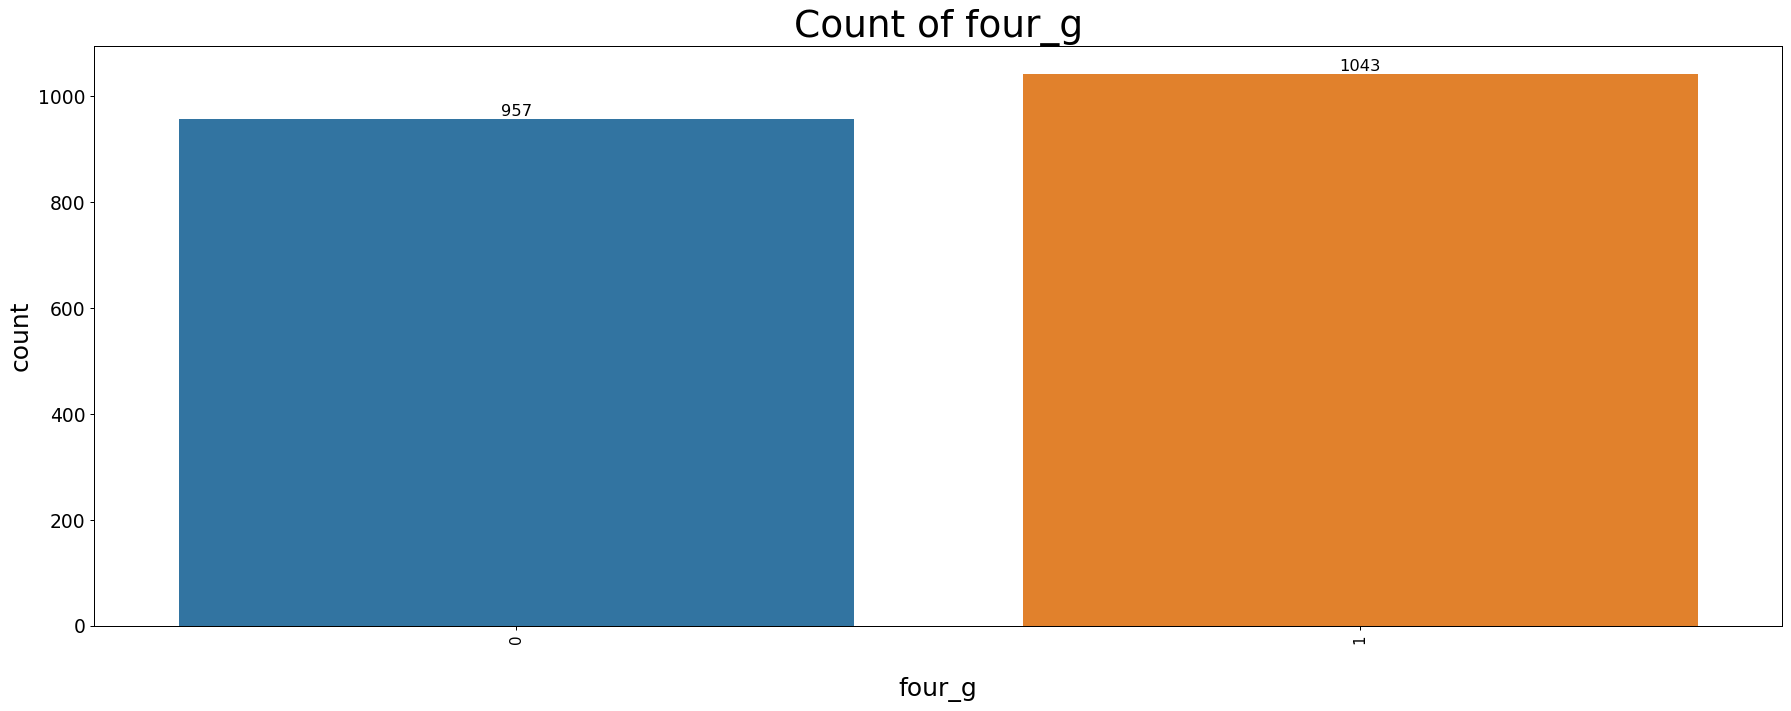

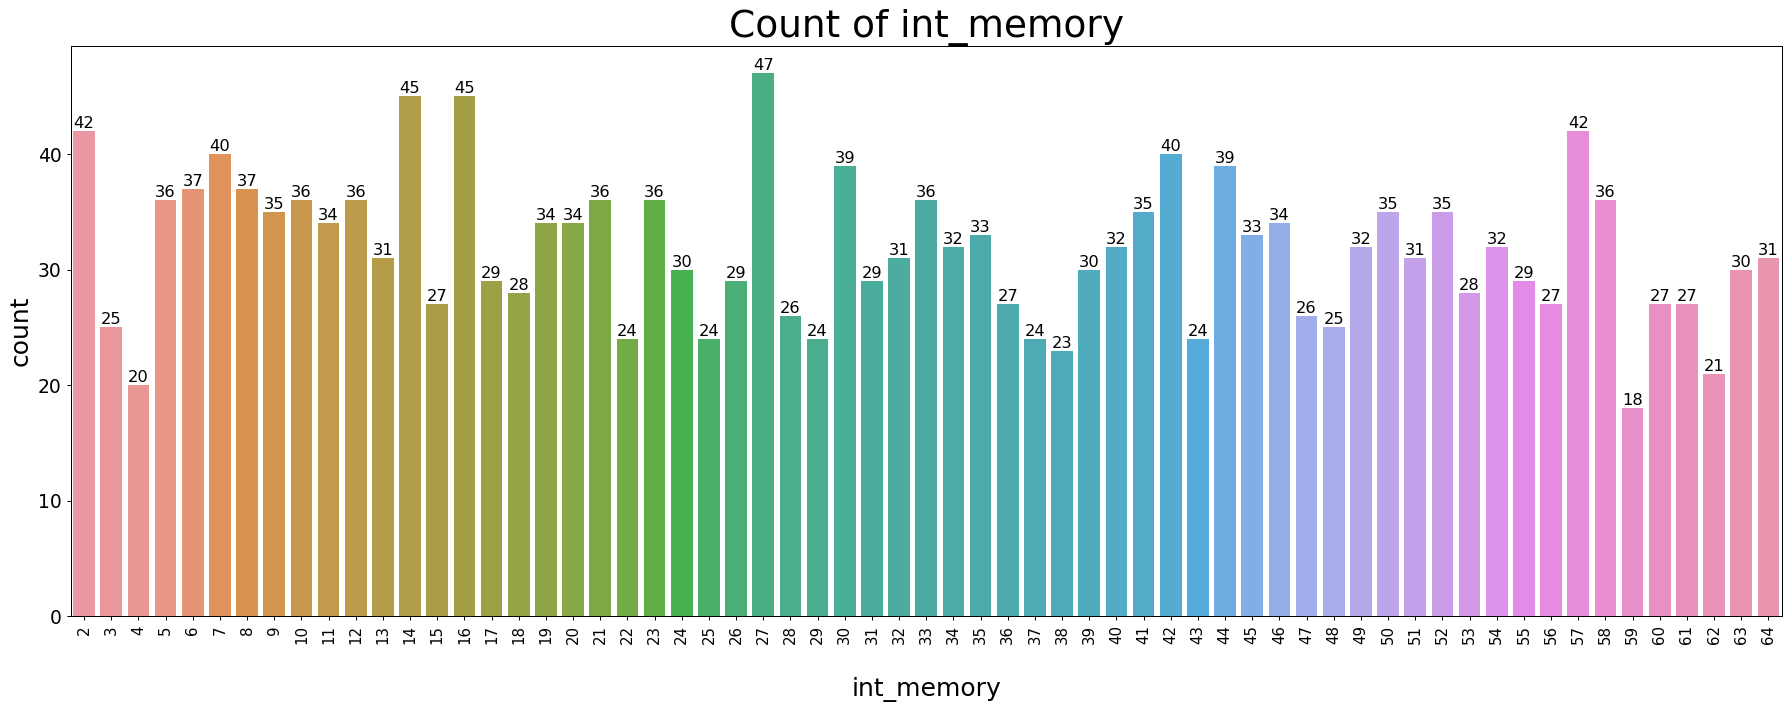

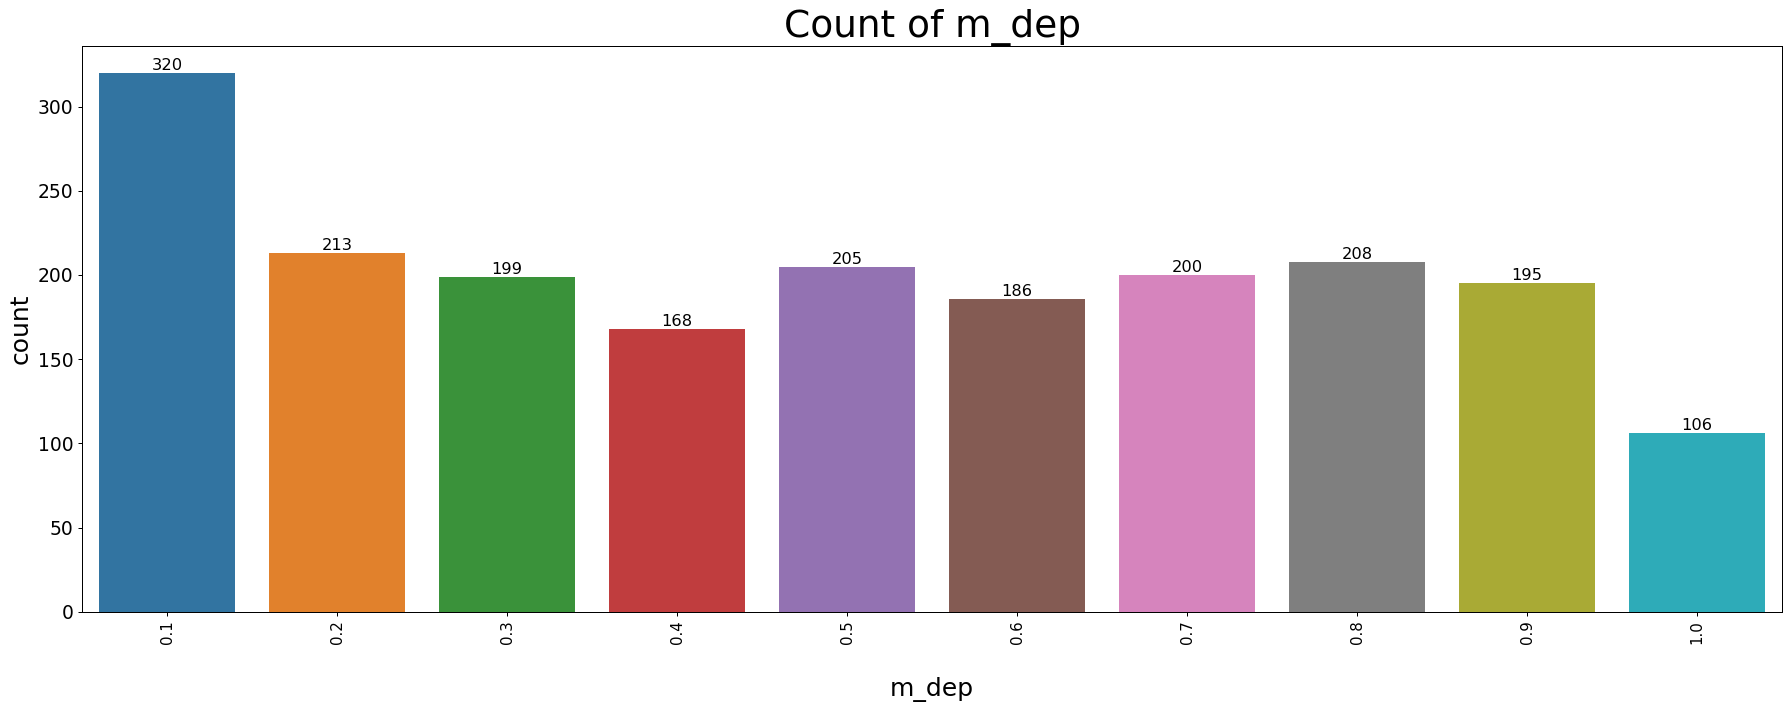

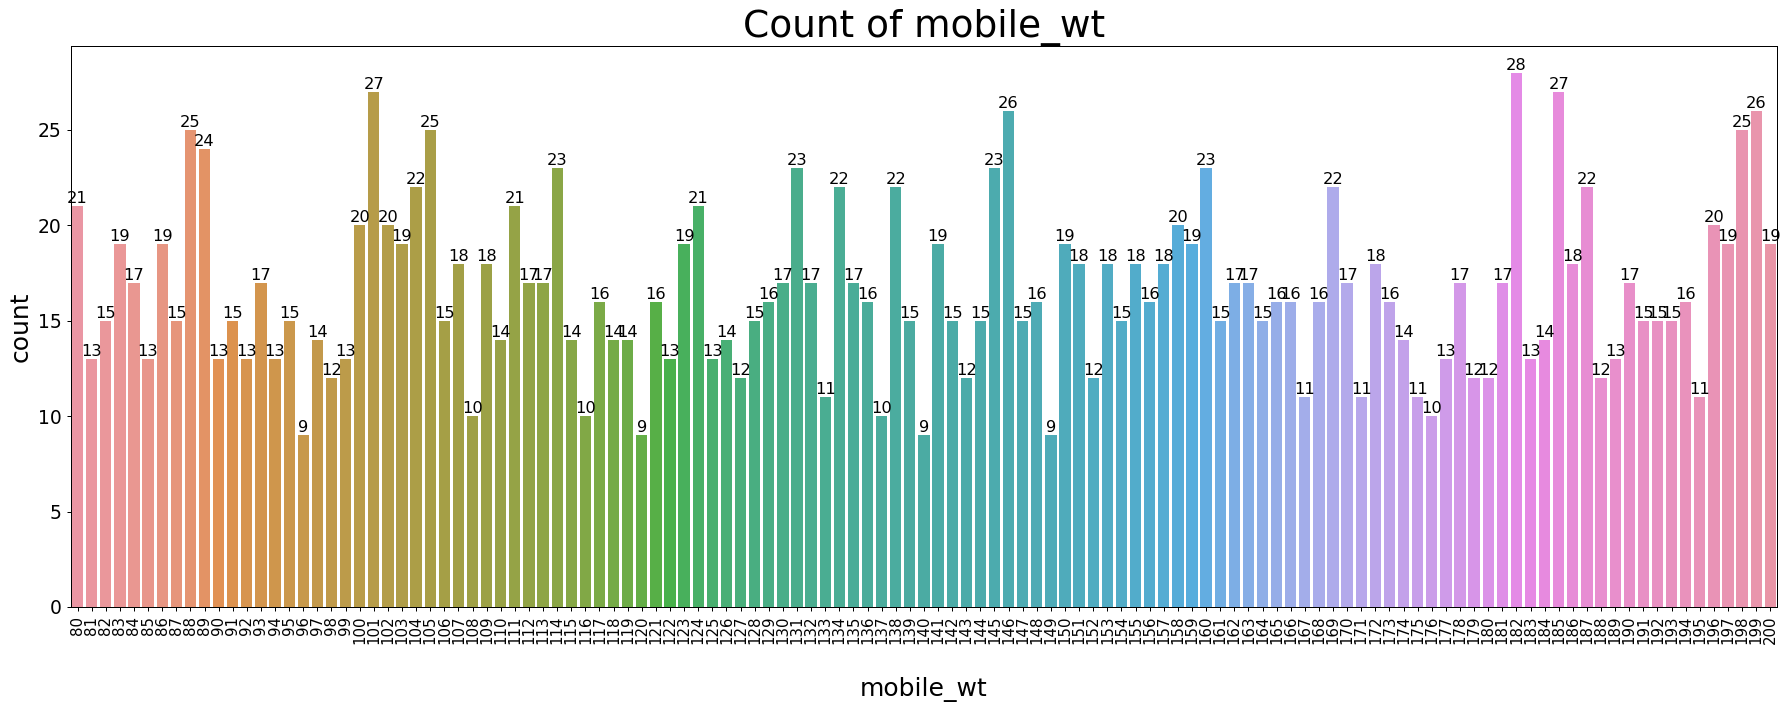

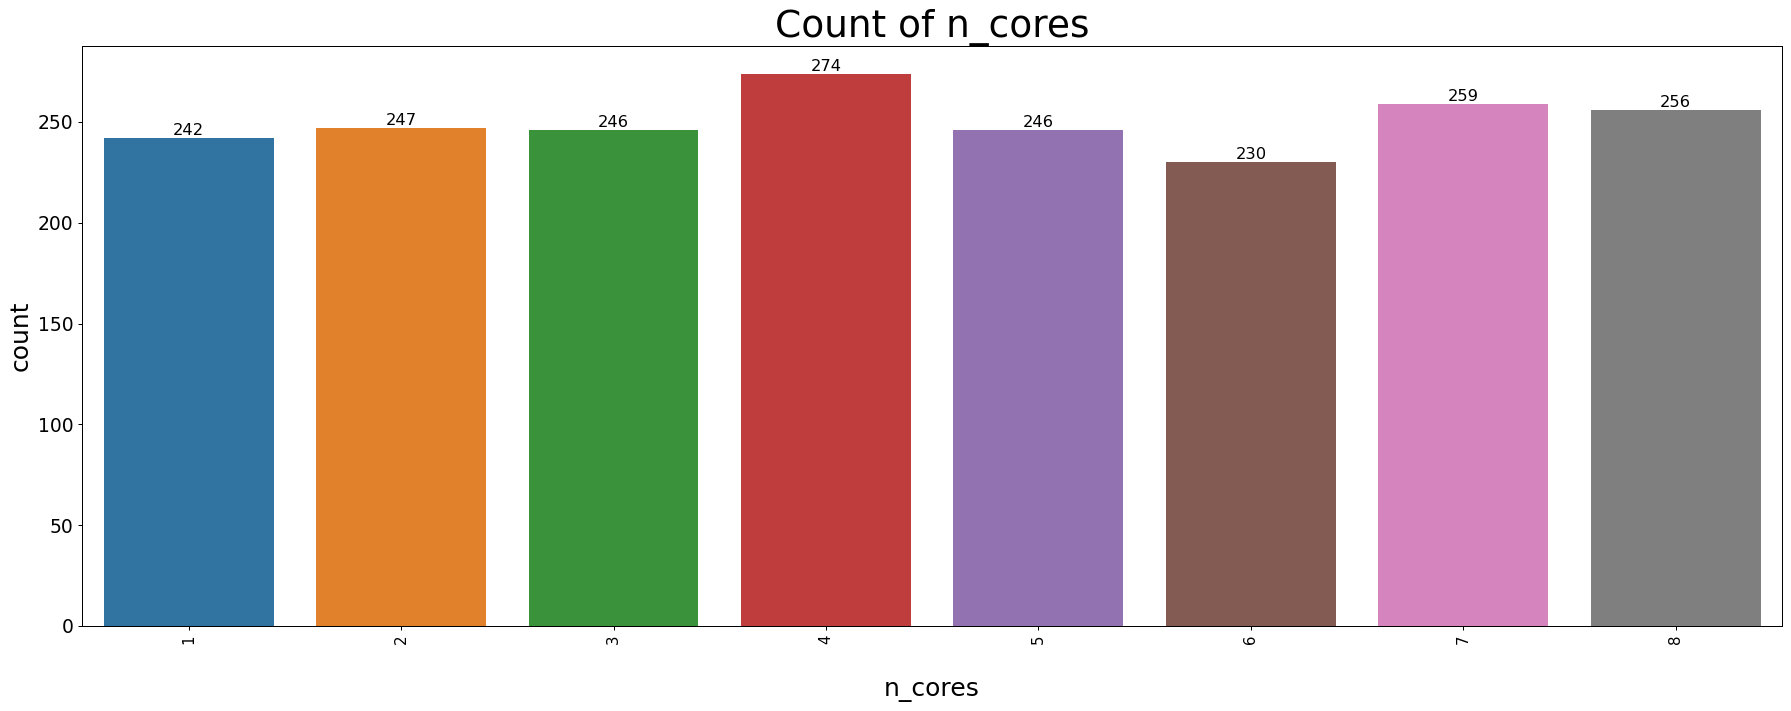

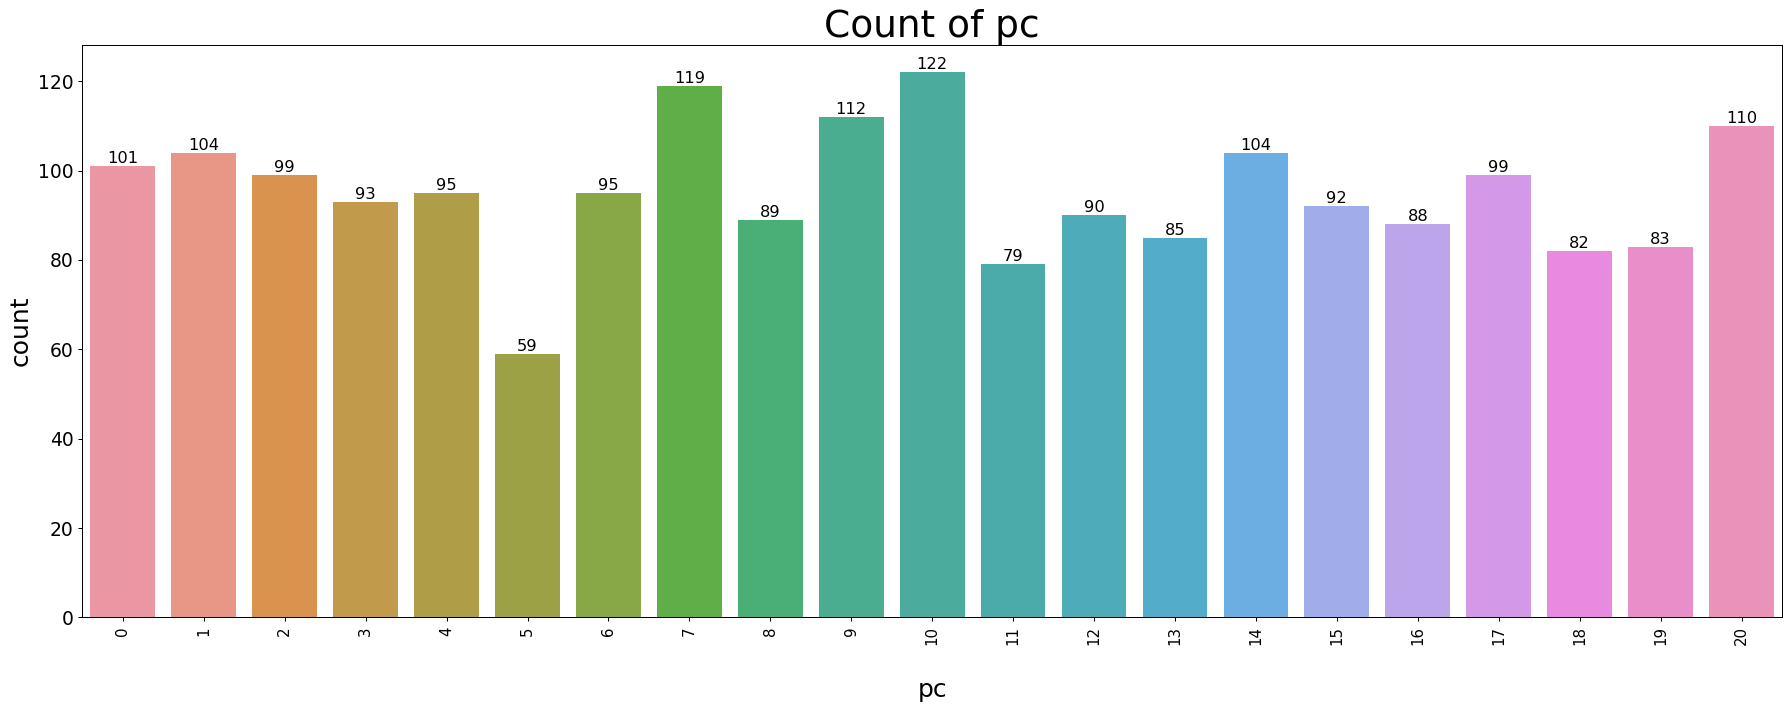

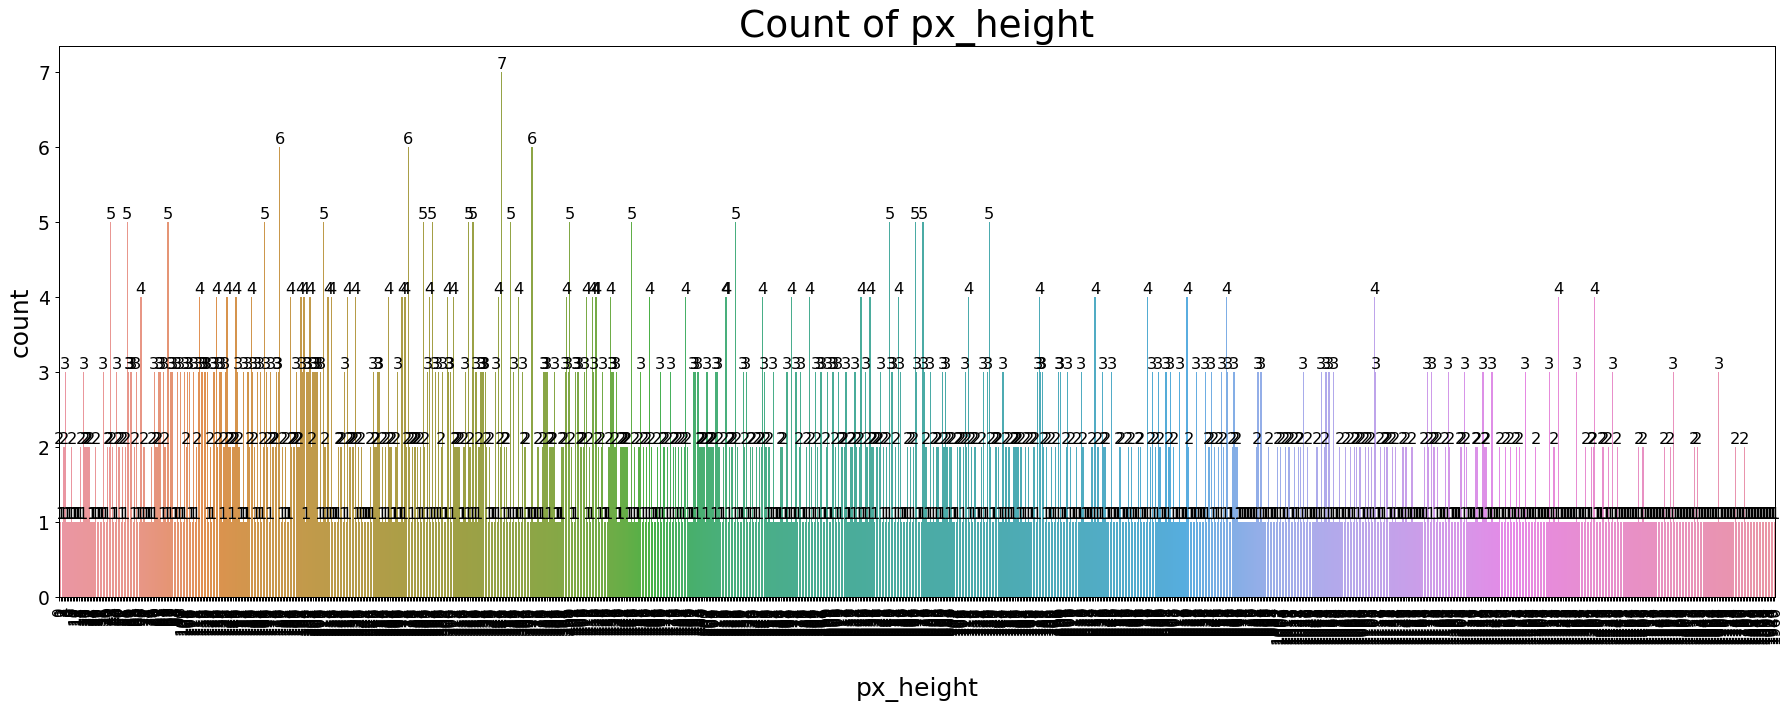

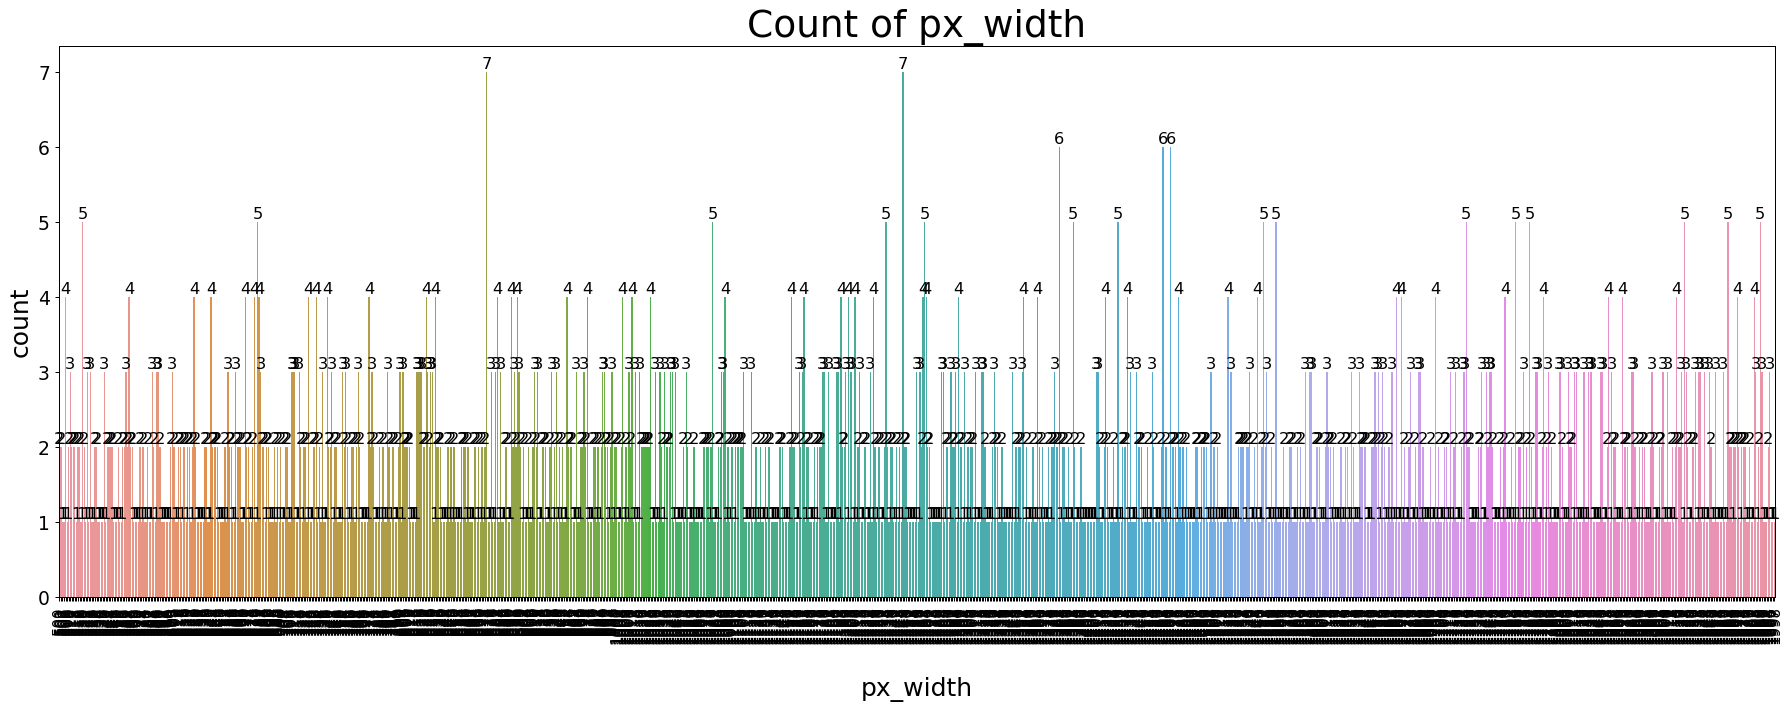

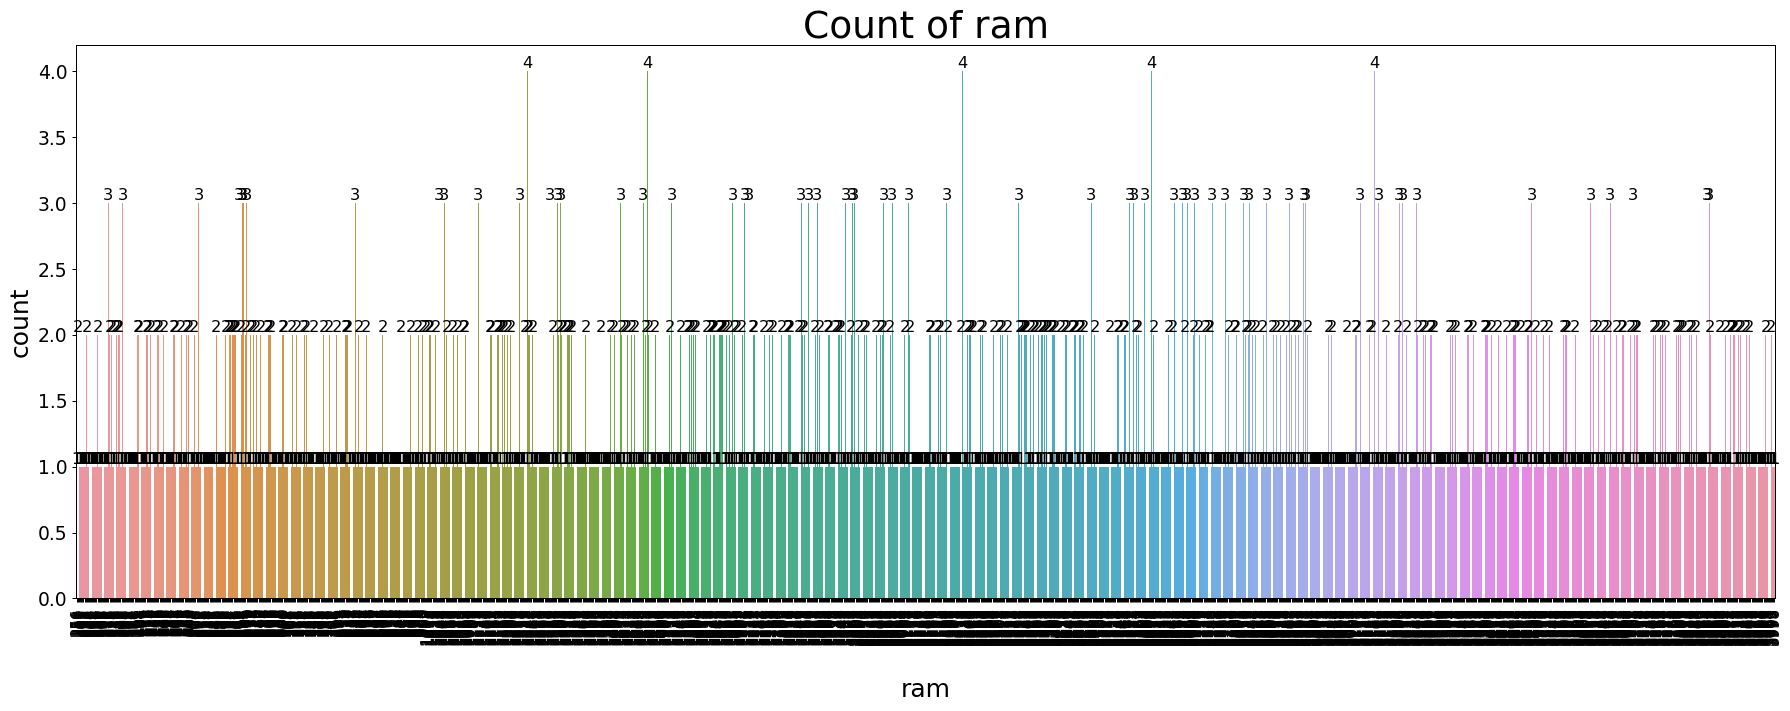

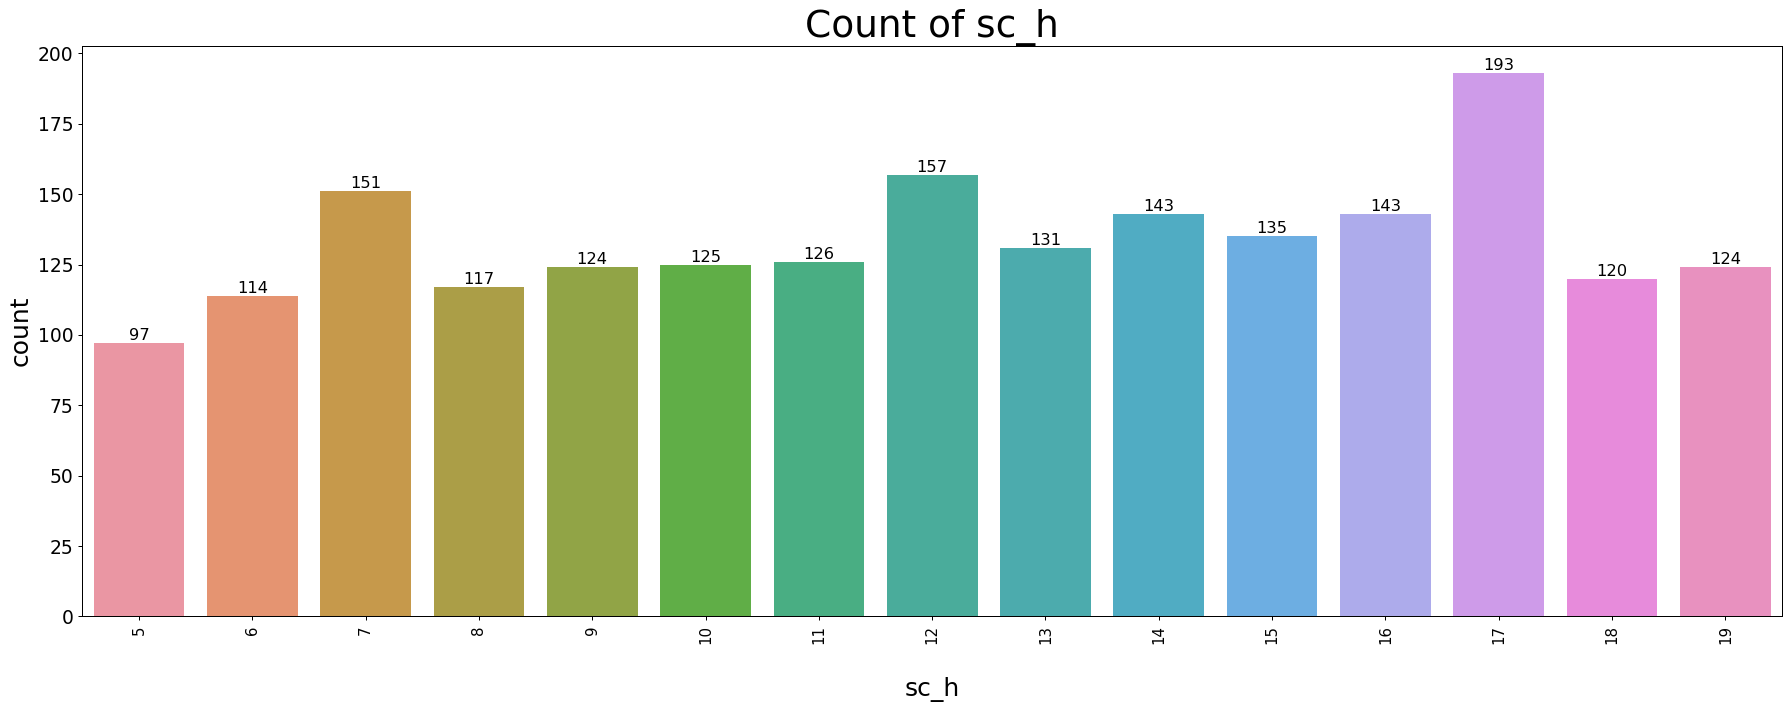

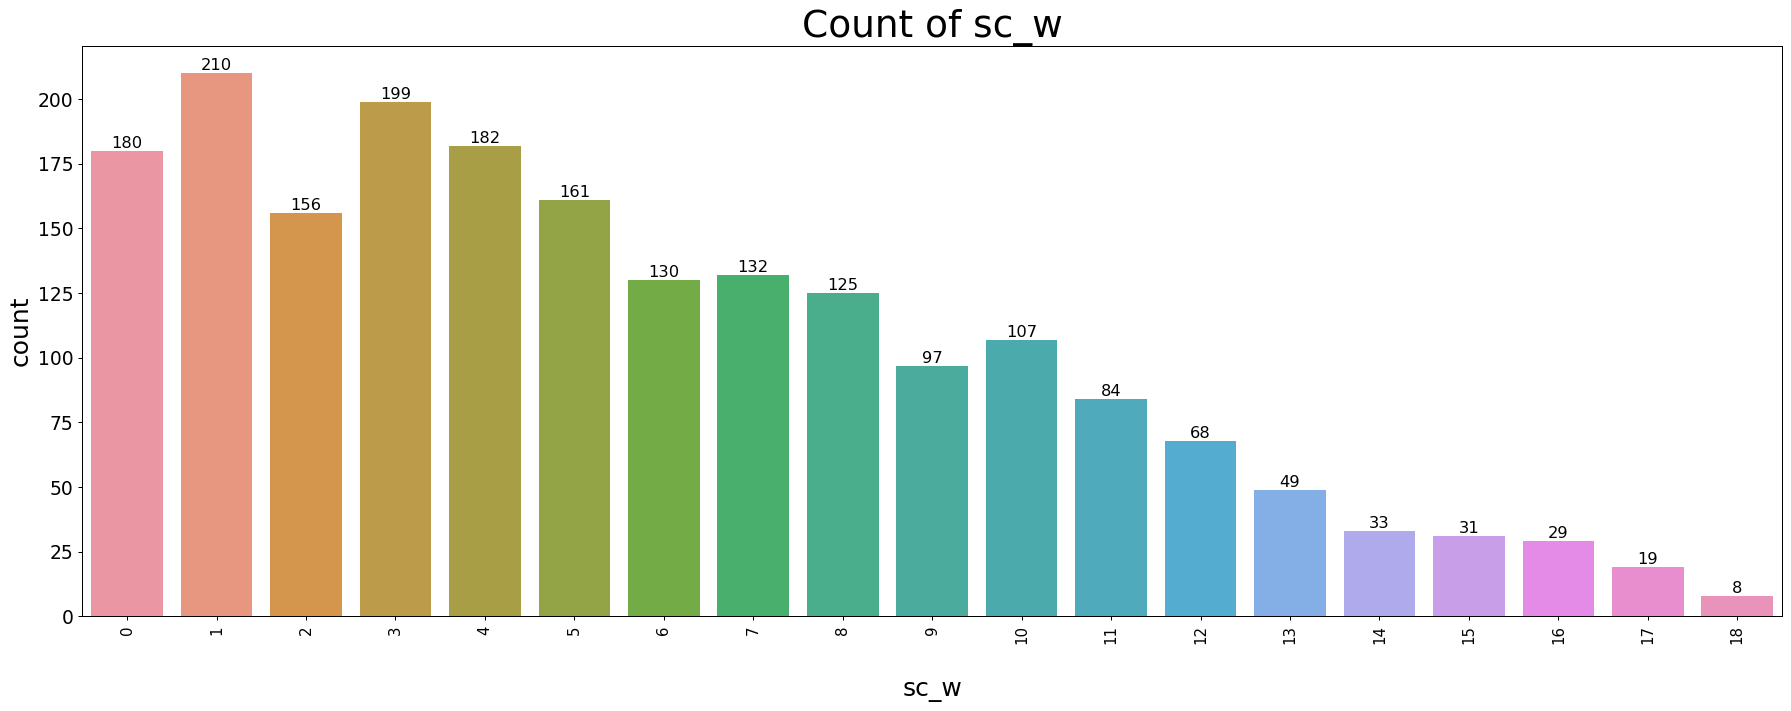

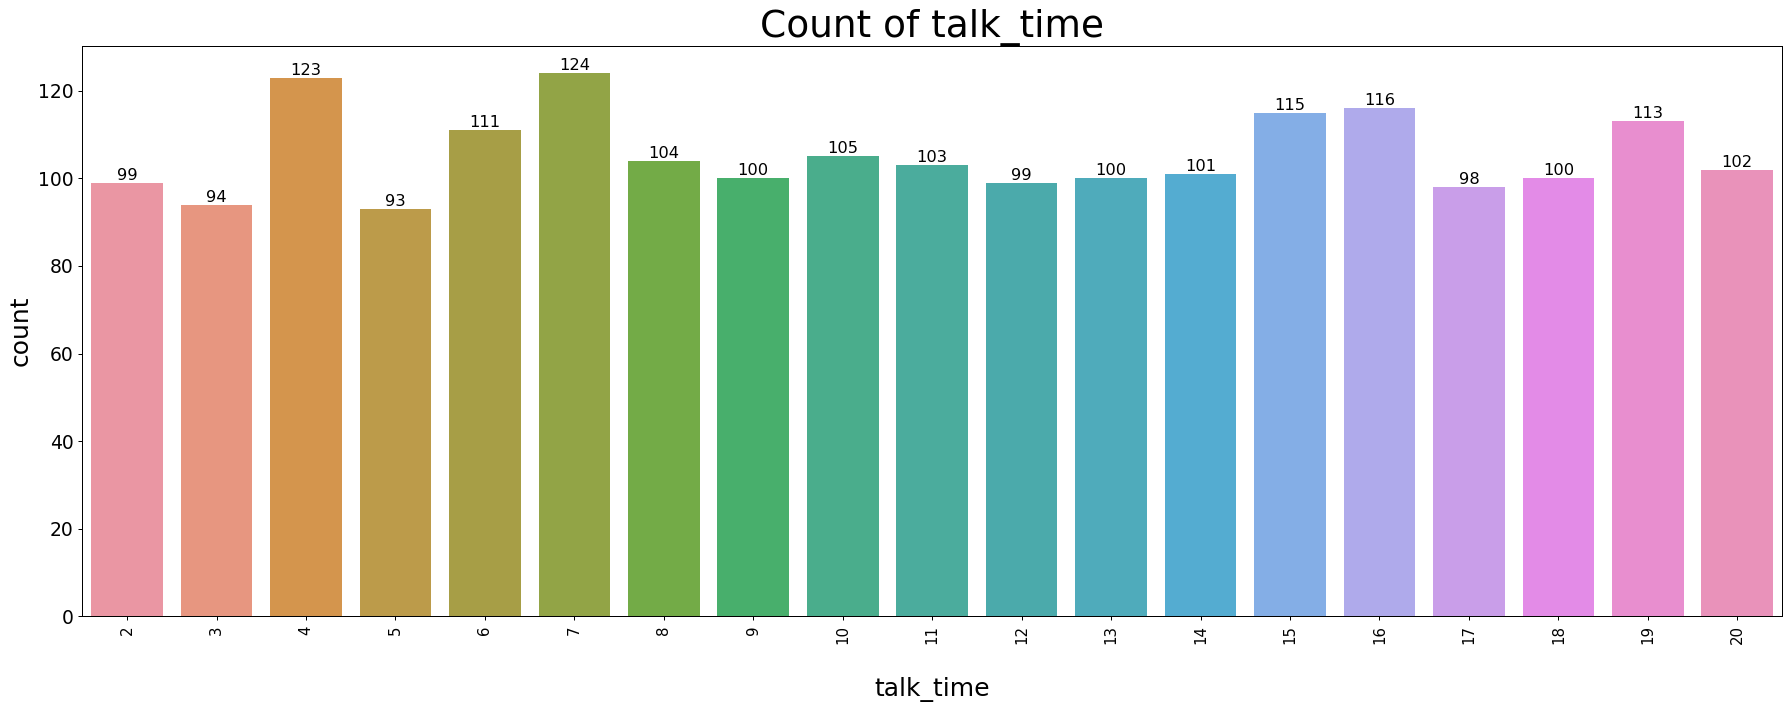

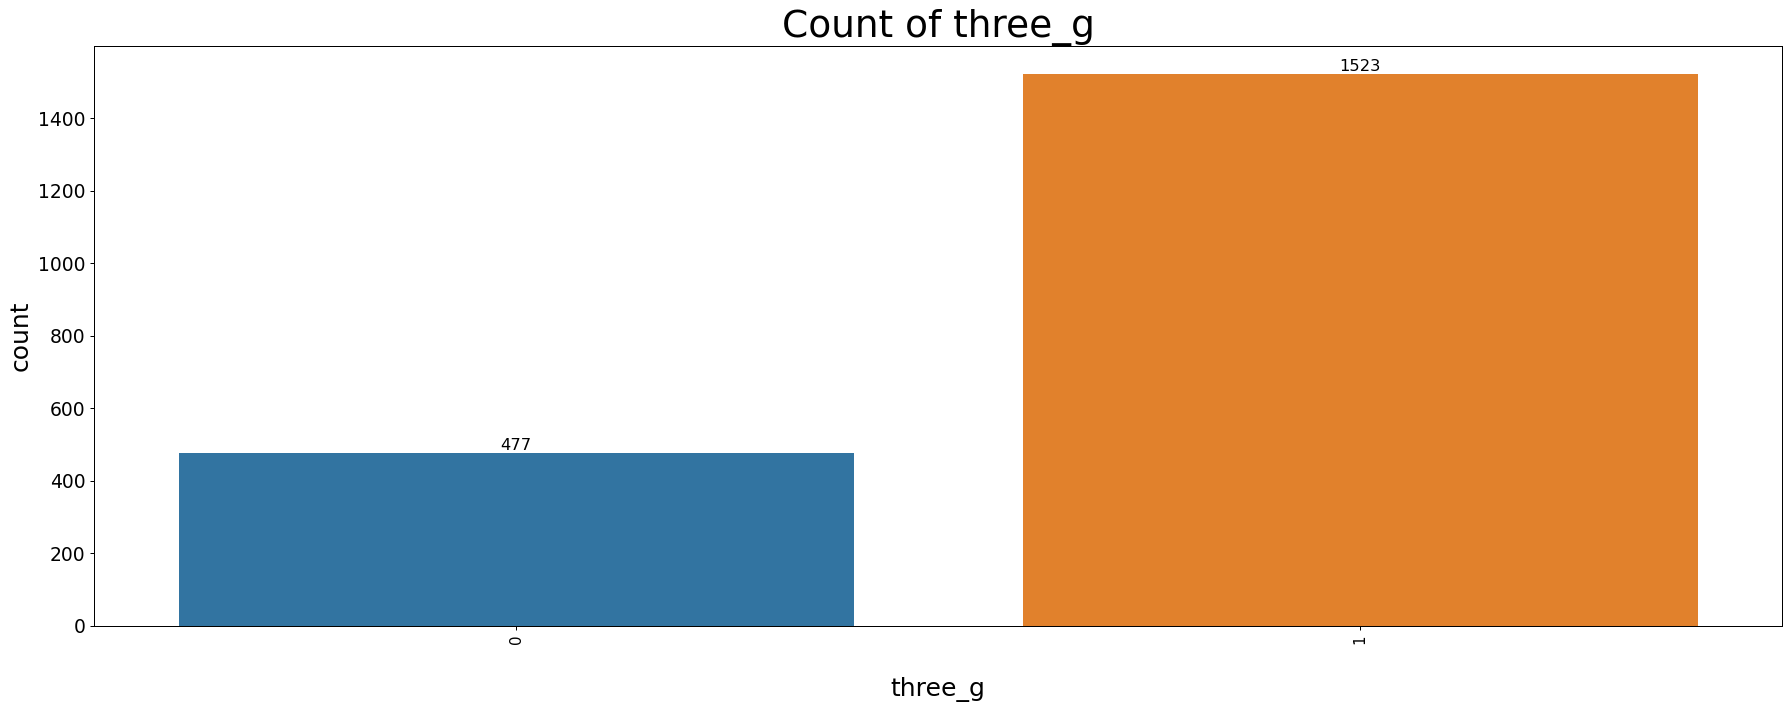

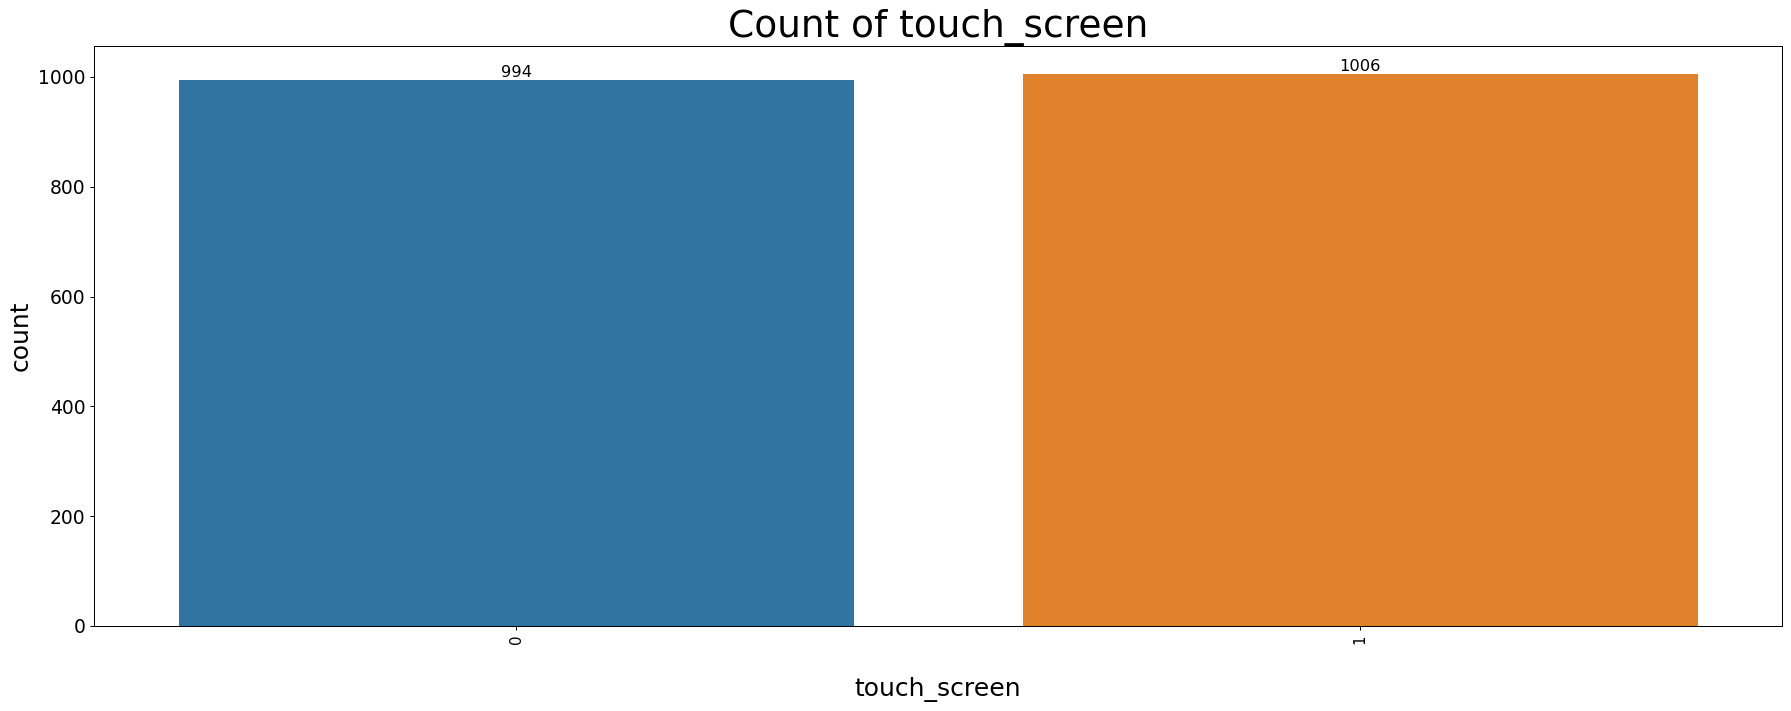

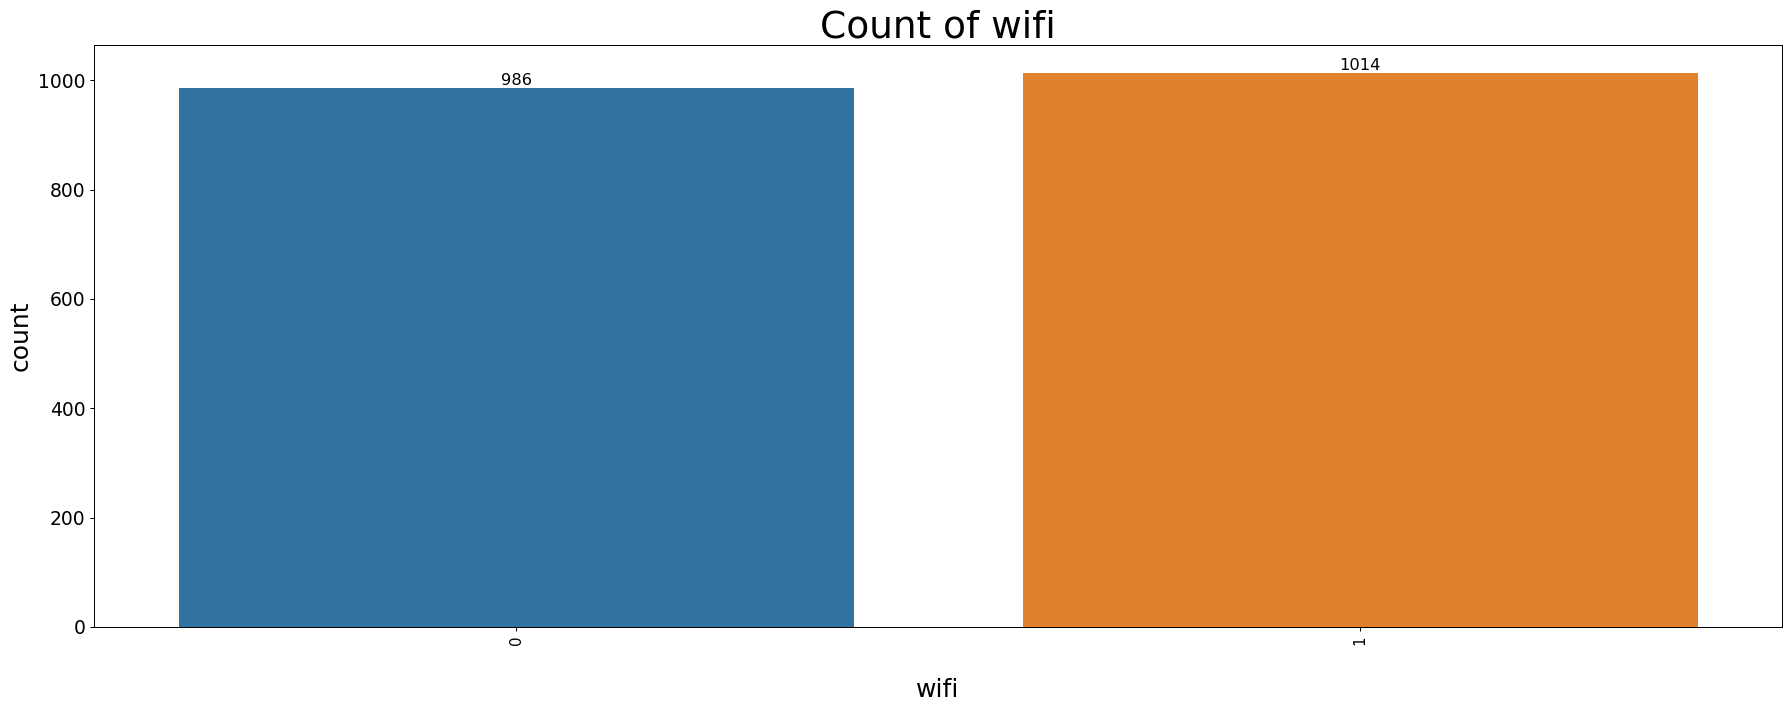

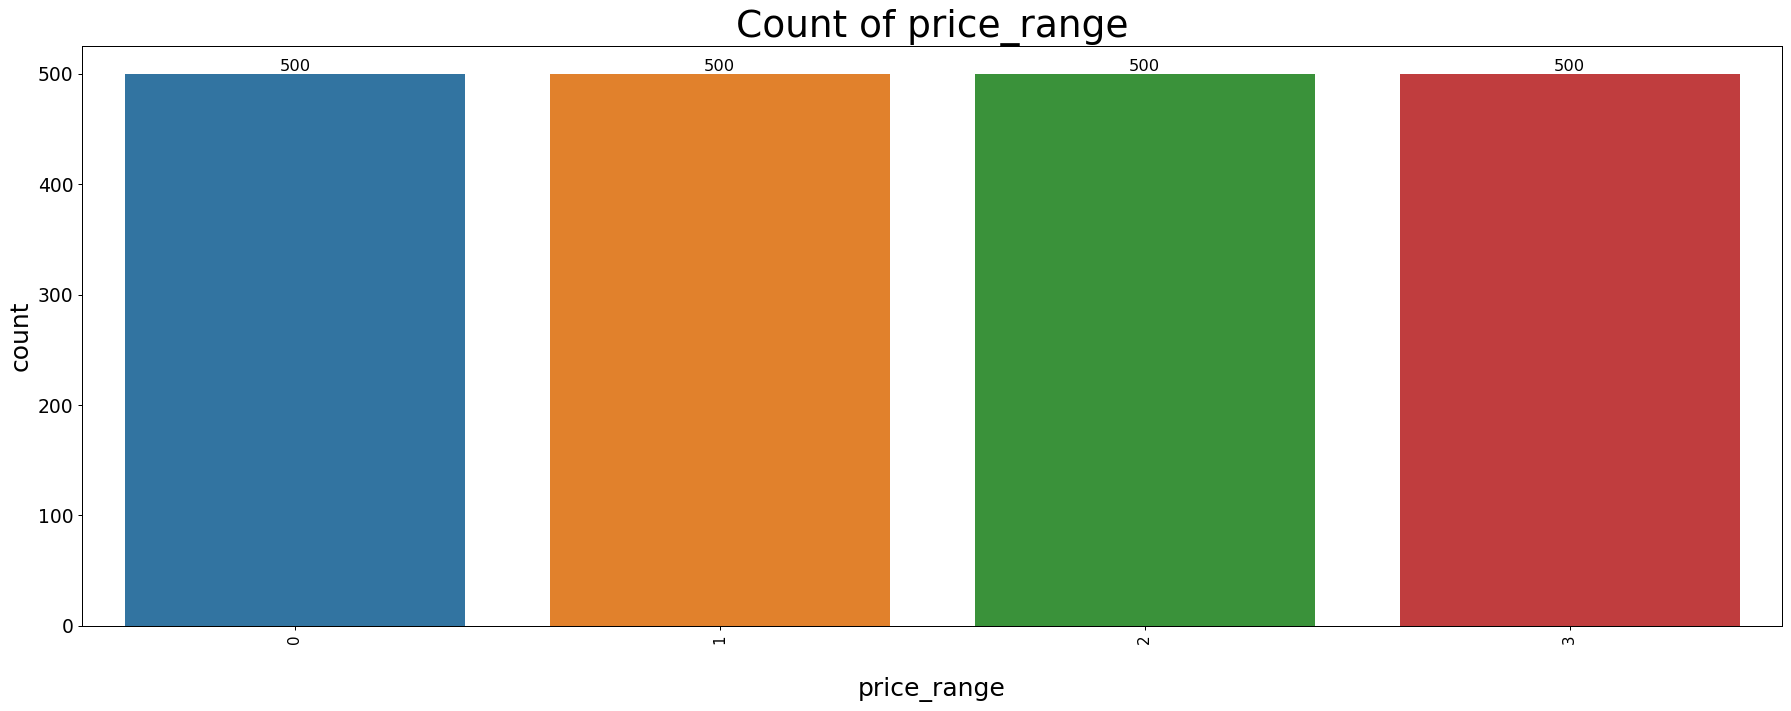

In [18]:
i = 0
j = len(df.columns)-1
while i<=j:
    count_plots(df, df.columns[i])
    plt.grid()
    i += 1
    plt.tight_layout()
    plt.show()

<div style=" font-size:14px; line_height:160%">
count of each category in the target column:

In [19]:
Counter(df["price_range"])

Counter({1: 500, 2: 500, 3: 500, 0: 500})

<div style=" font-size:14px; line_height:160%">
according to the dataset, there are samples with the "screen width" equal to zero! It is definitely impossible for a phone to have screen width = 0. Let's count them:

In [20]:
Counter(df["sc_w"]==0)

Counter({False: 1820, True: 180})

In [21]:
print(f"The pencentage of screen width = 0 is:  % {(180/2000)*100}")

The pencentage of screen width = 0 is:  % 9.0


<div style=" font-size:14px; line_height:160%">
Almost 10 percent of the samples have screen width = 0.

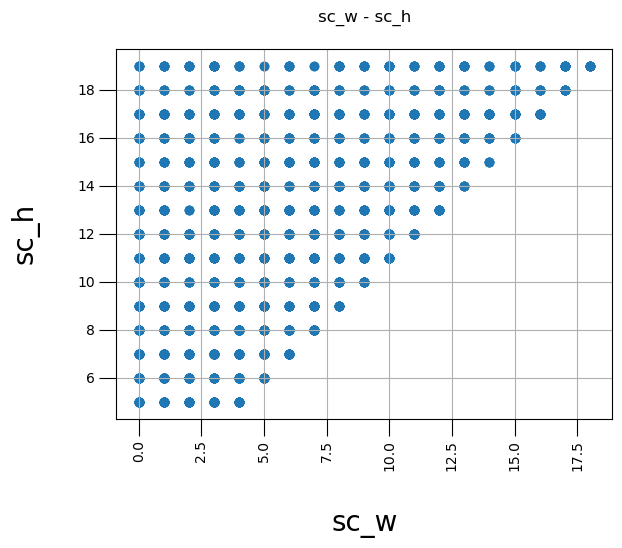

In [22]:
scatter_plots(df, "sc_w", "sc_h")

<div style=" font-size:14px; line_height:160%">
Take a look at this plot. There are mobile phones with screen width less than 2 cm and screen height from 5 cm up to 19 cm!  Do we have such phones in the real world?!

In [23]:
Counter(mobile_data_test["sc_w"]==0)

Counter({False: 888, True: 112})

<div style=" font-size:14px; line_height:160%">
As we can see, there are almost 10 percent of "screen width = 0" in the samples of the test dataset too. So, maybe we shouldn't do anything about them and leave them the way they are now. The owner of the data must know something about it.

In [24]:
Counter(df["m_dep"]>0.5)
# Counter(df["price_range"][df["m_dep"]>0.5])

Counter({True: 895, False: 1105})

<div style=" font-size:14px; line_height:160%">
The lowest thickness of a cellphone is greater than 0.5 mm. But here we see that over half of the samples in the dataset have mobile depth equal to 0.5 or lower. We absolutely need the data owner in this case.

In [25]:
# sorting the dataset by pixel width and pixel height respectively.
df.sort_values(by=["px_height", "px_width"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
801,1422,0,1.0,0,15,0,3,0.1,112,1,17,1,926,509,19,1,3,1,1,1,0
1536,1412,0,0.6,0,9,0,57,0.2,86,3,10,2,660,1853,15,10,18,0,0,1,1
1963,1906,1,1.9,1,3,0,55,0.2,113,3,4,3,629,1871,13,5,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1930,1,2.0,0,11,0,16,0.8,186,8,12,1901,1920,1783,17,3,13,0,0,1,2
260,754,0,0.5,1,7,1,59,0.7,178,7,10,1914,1928,1027,6,3,5,1,0,0,1
894,1497,1,0.7,0,5,0,32,0.7,92,3,9,1920,1933,1329,6,1,7,1,1,0,2
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3


In [26]:
Counter(df["px_height"]<320)

Counter({True: 568, False: 1432})

<div style=" font-size:14px; line_height:160%">
We have zeros in pixel height. Besides, we know the minimum pixel height for a mobile phone is 320 pixels. Here in the dataset we have 568 samples with pixel heights less than 320 pixels. 

In [27]:
Counter(df["px_width"]<df["px_height"])

Counter({False: 2000})

In [28]:
Counter(df["px_height"]<df["px_width"])

Counter({True: 2000})

<div style=" font-size:14px; line_height:160%">
On the other hand, generally in mobile phones the amount of pixel height is higher than the amount of pixel width. As it can be seen, in this dataset it is completely inverse! It seems that maybe we should swap the labels!

In [29]:
df_num_touch = df[df["touch_screen"]==0]
df_num_touch.shape

(994, 21)

<div style=" font-size:14px; line_height:160%">
994 samples doesn't have touch screen which might not give us a significant sense about the datas.

In [30]:
df_num_3G = df[df["three_g"]==0]
Counter(df_num_3G["four_g"])

Counter({0: 477})

<div style=" font-size:14px; line_height:160%">
There are 477 samples that doesn't have 3G or 4G .

In [31]:
df_num_camera = df[df["pc"]==0]
Counter(df_num_camera["fc"])

Counter({0: 101})

<div style=" font-size:14px; line_height:160%">
There are 101 samples that doesn't have front or primary camera.

In [32]:
df_num_front = df[df["fc"]==0]
Counter(df_num_front["pc"]>0)

# Counter(df_num_front["pc"])           # it gives us a dict, it's keys are "pc values" and it's values are "the counts of pc values"
# Counter(df_num_front["pc"]).values()  # it gives us "the counts of values" in a list and does't give us the "pc values"
# df_num_front["pc"].value_counts()     # it gives us the "pc values" and the "counts of each pc value" sorted by the counts
# sorted(Counter(df_num_front["pc"]))   # it gives us only the keys (the pc values) and not the count of each one

Counter({True: 373, False: 101})

<div style=" font-size:14px; line_height:160%">
There are 373 samples that have primary camera but don't have front camera.

In [33]:
df_num_blue = df[df["blue"]==0]
df_num_blue.shape

(1010, 21)

<div style=" font-size:14px; line_height:160%">
There are 1010 samples that doesn't have bluetooth.

In [34]:
df_num_wifi = df[df["wifi"]==0]
df_num_wifi.shape

(986, 21)

<div style=" font-size:14px; line_height:160%">
There are 986 samples that doesn't have wifi.

<div style=" font-size:26px; line_height:160%">
Let's setup our models

<div style=" font-size:22px; line_height:160%">
Decision Tree Model

In [35]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [36]:
X = df.drop("price_range", axis=1).values
y = df.price_range.values.reshape(-1, 1)
# X, y are now both 2D arrays

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [39]:
dt_accuracy = metrics.accuracy_score(y_test, y_pred)

In [40]:
print("Accuracy:", dt_accuracy)

Accuracy: 0.8275


<div style=" font-size:14px; line_height:160%">
finding the best hyperparameters

In [41]:
parameters = {"max_depth": range(1, 20), 
              "splitter": ["best", "random"]
             }

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_dt = GridSearchCV(estimator=dt,  # Model
                      param_grid=parameters,
                      scoring="accuracy",  # Strategy to evaluate the performance of the cross-validated model on the test set
                                           # if it is a multiclass target, use f1_micro
                                           # f1 or roc_auc doesn't work with multiclass targets
                                           # f1_micro and accuracy were OK here.
                      cv=cv ,  #cross-validation generator
                      verbose=1,  #Time to calculate
                      n_jobs=-1)  #Help to CPU

grid_dt.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 38 candidates, totalling 380 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [42]:
grid_dt.best_params_

{'max_depth': 8, 'splitter': 'best'}

<div style=" font-size:14px; line_height:160%">
building the model with the best hyperparameters

In [43]:
dt = DecisionTreeClassifier(max_depth=8, 
                            splitter='best', 
                            random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

<div style=" font-size:14px; line_height:160%">
The Confusion Matrix

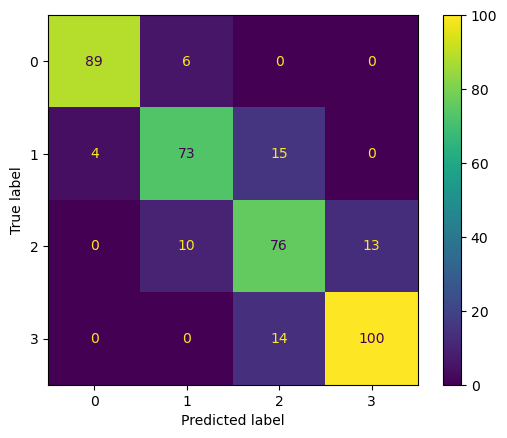

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

<div style=" font-size:14px; line_height:160%">
The Classification Report

In [45]:
target_names = ["class '0'", "class '1'", "class '2'", "class '3'"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   class '0'       0.96      0.94      0.95        95
   class '1'       0.82      0.79      0.81        92
   class '2'       0.72      0.77      0.75        99
   class '3'       0.88      0.88      0.88       114

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



<div style=" font-size:18px; line_height:160%">
Now we have to predict the prices of the given mobile phones features dataset.

In [46]:
DF = mobile_data_test.copy()

DF.shape

(1000, 21)

<div style=" font-size:14px; line_height:160%">
The dataset has one extra column. Let's see the column labels:

In [47]:
DF.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

<div style=" font-size:14px; line_height:160%">
The label "id" is surplus and needs to be dropped.

In [48]:
DF.drop("id", axis=1, inplace=True)

<div style=" font-size:14px; line_height:160%">
Let's predict the test data:

In [49]:
dt.fit(X, y)

predicted_prices_dt = dt.predict(DF.values)
predicted_prices_dt = pd.DataFrame(predicted_prices_dt.reshape(-1, 1), columns=["price_range"])

mobile_prices = pd.concat([DF, predicted_prices_dt], axis=1)
mobile_prices

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,1
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


<div style=" font-size:22px; line_height:160%">
Random Forest

In [50]:
X = df.drop("price_range", axis=1).values
y = df.price_range.values.reshape(-1, 1)
# X, y are now both 2D arrays

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

In [53]:
rf_accuracy = metrics.accuracy_score(y_test, y_pred)

In [54]:
print("Accuracy:", rf_accuracy)

Accuracy: 0.8575


In [55]:
parameters = [
              {"max_depth": range(5, 20), 
               "n_estimators": [50, 100, 150]
              }
             ]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_rf = GridSearchCV(estimator=rf,  # Model
                      param_grid=parameters, 
                      scoring="f1_micro",  # Strategy to evaluate the performance of the cross-validated model on the test set
                                           # if it is a multiclass target, use f1_micro
                                           # f1 or roc_auc doesn't work with multiclass targets
                                           # f1_micro and accuracy were OK here.
                      cv=cv,  # cross-validation generator
                      verbose=1,  # Time to calculate
                      n_jobs=-1)  # Help to CPU

grid_rf.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 45 candidates, totalling 450 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': range(5, 20),
                          'n_estimators': [50, 100, 150]}],
             scoring='f1_micro', verbose=1)

In [56]:
grid_rf.best_params_

{'max_depth': 17, 'n_estimators': 150}

In [57]:
rf = RandomForestClassifier(n_estimators=150, 
                            max_depth=17, 
                            random_state=0)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

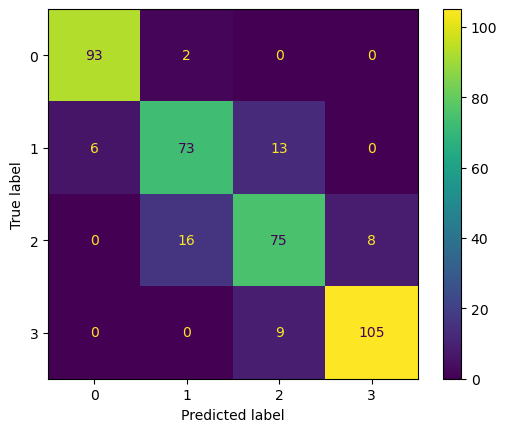

In [58]:
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [59]:
target_names = ["class '0'", "class '1'", "class '2'", "class '3'"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   class '0'       0.94      0.98      0.96        95
   class '1'       0.80      0.79      0.80        92
   class '2'       0.77      0.76      0.77        99
   class '3'       0.93      0.92      0.93       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



<div style=" font-size:14px; line_height:160%">
Let's predict the test data:

In [60]:
rf.fit(X, y.ravel())

predicted_prices_rf = rf.predict(DF.values)
predicted_prices_rf = pd.DataFrame(predicted_prices_rf.reshape(-1, 1), columns=["price_range"])

mobile_prices_rf = pd.concat([DF, predicted_prices_rf], axis=1)
mobile_prices_rf

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


<div style=" font-size:22px; line_height:160%">
Support Vector Machines

In [61]:
X = df.drop("price_range", axis=1).values
y = df.price_range.values.reshape(-1, 1)
# X, y are now both 2D arrays

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div style=" font-size:14px; line_height:160%">
Since this model works based on the distances between points, we have to scale the features' values.

<div style=" font-size:14px; line_height:160%">
We use Standard Scaler to scale the features' values.

In [63]:
scaler = StandardScaler()
X_train_scaling = scaler.fit_transform(X_train)
X_test_scaling = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaling, columns=df.drop("price_range", axis=1).columns)
X_test_scaled = pd.DataFrame(X_test_scaling, columns=df.drop("price_range", axis=1).columns)


In [64]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train.ravel())
y_pred = svm.predict(X_test)

In [65]:
svm_accuracy = metrics.accuracy_score(y_test, y_pred)

In [66]:
print("Accuracy:", svm_accuracy)

Accuracy: 0.955


In [67]:
parameters = [{'kernel': ['poly'], 
               'degree': [2, 3, 4, 5], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01, 0.1, 1, 10, 100, 1000]},
                  
              {'kernel': ['linear'],
               'C': [0.01, 0.1, 1, 10, 100, 1000]}
             ]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_svm = GridSearchCV(estimator=svm,  # Model
                      param_grid=parameters,  
                      scoring="f1_micro",  # Strategy to evaluate the performance of the cross-validated model on the test set
                                           # if it is a multiclass target, use f1_micro
                                           # f1 or roc_auc doesn't work with multiclass targets
                                           # f1_micro and accuracy were OK here.
                      cv=cv,  # cross-validation generator
                      verbose=1,  # Time to calculate
                      n_jobs=-1)  # Help to CPU

grid_svm.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 186 candidates, totalling 930 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']}],
             scoring='f1_micro', verbose=1)

In [68]:
grid_svm.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [69]:
svm = SVC(C=0.01, 
          kernel="linear", 
          random_state=0)
svm.fit(X_train, y_train.ravel())
y_pred = svm.predict(X_test)

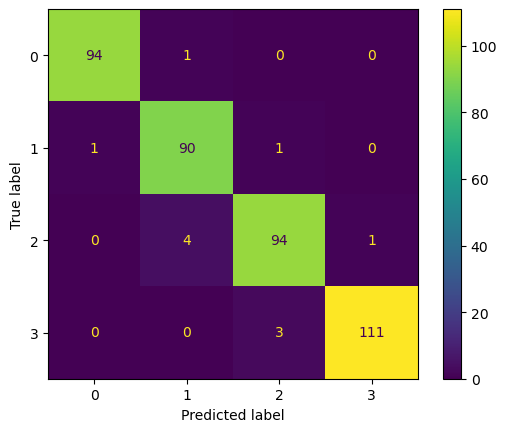

In [70]:
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [71]:
target_names = ["class '0'", "class '1'", "class '2'", "class '3'"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   class '0'       0.99      0.99      0.99        95
   class '1'       0.95      0.98      0.96        92
   class '2'       0.96      0.95      0.95        99
   class '3'       0.99      0.97      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



<div style=" font-size:14px; line_height:160%">
Let's predict the test data:

In [72]:
X = df.drop("price_range", axis=1).values
y = df.price_range.values.reshape(-1, 1)
# X, y are now both 2D arrays

In [73]:
scaler = StandardScaler()

X_scaling = scaler.fit_transform(X)
DF_scaling = scaler.transform(DF.values)

X_scaled = pd.DataFrame(X_scaling, columns=df.drop("price_range", axis=1).columns)
DF_scaled = pd.DataFrame(DF_scaling, columns=DF.columns)


In [74]:
svm.fit(X_scaled, y.ravel())

predicted_prices_svm = svm.predict(DF_scaled)
predicted_prices_svm = pd.DataFrame(predicted_prices_svm.reshape(-1, 1), columns=["price_range"])

mobile_prices_svm = pd.concat([DF, predicted_prices_svm], axis=1)
mobile_prices_svm

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,2
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


<div style=" font-size:14px; line_height:160%">
The accuracy of the Decsion Tree model: 0.8275

<div style=" font-size:14px; line_height:160%">
The accuracy of the Random Forest model: 0.8575

<div style=" font-size:14px; line_height:160%">
The accuracy of the SVM model: 0.955

<div style=" font-size:18px; line_height:160%">
Conclusion:

<div style=" font-size:14px; line_height:160%">
As you can see, this dataset was very noisy and that's why models like Decision Tree and Random Forest did not perform well because they are sensitive to noise and overfit on noisy data. On the opposite point, SVM is a noise-resistant algorithm because it works only in terms of support vectors, and for this reason, it performs best on this dataset.